<a href="https://colab.research.google.com/github/lifahjdm/House-Prices-Prediction/blob/main/Jabodetabek_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import Library

import pandas as pd
import numpy as np

#visual
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pylab as py
#add
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# **Load Data**

In [ ]:
path="/content/drive/MyDrive/Colab Notebooks/jabodetabek_house_price.csv"
df = pd.read_csv(path)
df.head()

,url,harga,title,address,district,city,lat,long,facilities,tipe_properti,ads_id,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,certificate,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,hos11360272,4.0,4.0,239.0,272.0,0,shm - sertifikat hak milik,4400 mah,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,hos10680347,3.0,2.0,55.0,69.0,1,hgb - hak guna bangunan,2200 mah,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,hos10685867,3.0,3.0,119.0,131.0,1,hgb - hak guna bangunan,2200 mah,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,hos10927790,3.0,3.0,180.0,174.0,0,shm - sertifikat hak milik,3500 mah,1,1,2.0,6.0,2016.0,bagus sekali,utara,2,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,hos10785530,4.0,3.0,328.0,196.0,2,shm - sertifikat hak milik,3500 mah,1,1,2.0,9.0,2013.0,bagus,utara,1,unfurnished


In [ ]:
df.shape

(3553, 27)

In [ ]:
df = df.drop(['url','district','address','lat','long','facilities','ads_id','certificate','carports','electricity'], axis=1)
df.head()

,harga,title,city,tipe_properti,bedrooms,bathrooms,land_size_m2,building_size_m2,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,Bekasi,rumah,4.0,4.0,239.0,272.0,0,1,2.0,5.0,2017.0,bagus,NaN,0,unfurnished
1,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi",Bekasi,rumah,3.0,2.0,55.0,69.0,0,0,2.0,NaN,NaN,bagus,NaN,0,NaN
2,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,Bekasi,rumah,3.0,3.0,119.0,131.0,1,1,2.0,NaN,NaN,bagus,NaN,1,unfurnished
3,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,Bekasi,rumah,3.0,3.0,180.0,174.0,1,1,2.0,6.0,2016.0,bagus sekali,utara,2,unfurnished
4,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...",Bekasi,rumah,4.0,3.0,328.0,196.0,1,1,2.0,9.0,2013.0,bagus,utara,1,unfurnished


In [ ]:
df = df.drop(['maid_bedrooms','title','tipe_properti','maid_bathrooms','building_age','year_built','building_orientation','furnishing','property_condition'], axis=1)
df.head()

,harga,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,2.0,0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2.0,0
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,2.0,1
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,2.0,2
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,1


In [ ]:
#Mendeteksi nilai yang hilang atau Null
df.isnull().sum()


,0
harga,0
city,0
bedrooms,34
bathrooms,29
land_size_m2,2
building_size_m2,2
floors,6
garages,0


In [ ]:
df = df.dropna()
df.isnull().sum()

,0
harga,0
city,0
bedrooms,0
bathrooms,0
land_size_m2,0
building_size_m2,0
floors,0
garages,0


In [ ]:
df.shape

(3510, 8)

In [ ]:
df.groupby('city')['city'].count()

,city
city,
Bekasi,574
Bogor,873
Depok,520
Jakarta Barat,205
Jakarta Pusat,38
Jakarta Selatan,239
Jakarta Timur,95
Jakarta Utara,124
Tangerang,842


In [ ]:
df.city = df.city.apply(lambda x: x.strip())
city_stats = df.groupby('city')['city'].count().sort_values(ascending=False)
city_stats

,city
city,
Bogor,873
Tangerang,842
Bekasi,574
Depok,520
Jakarta Selatan,239
Jakarta Barat,205
Jakarta Utara,124
Jakarta Timur,95
Jakarta Pusat,38


In [ ]:
print("Missing values per fitur:")
print(df.isnull().sum())

Missing values per fitur:
harga               0
city                0
bedrooms            0
bathrooms           0
land_size_m2        0
building_size_m2    0
floors              0
garages             0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3510 entries, 0 to 3552
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   harga             3510 non-null   float64
 1   city              3510 non-null   object 
 2   bedrooms          3510 non-null   float64
 3   bathrooms         3510 non-null   float64
 4   land_size_m2      3510 non-null   float64
 5   building_size_m2  3510 non-null   float64
 6   floors            3510 non-null   float64
 7   garages           3510 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 246.8+ KB


# **Exploratory Data Analysis**

In [ ]:
df.head()

,harga,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,2.0,0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2.0,0
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,2.0,1
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,2.0,2
4,4.500000e+09,Bekasi,4.0,3.0,328.0,196.0,2.0,1


In [ ]:
# gambaran umum tentang distribusi data numerik dari berbagai fitur properti
df.describe()

,harga,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
count,3.510000e+03,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000,3510.000000
mean,4.187003e+09,3.325641,2.621368,202.958405,186.356410,1.766667,0.712251
std,1.381983e+10,2.673599,2.696472,396.348308,248.972632,0.633873,1.314081
min,4.200000e+07,1.000000,1.000000,12.000000,1.000000,1.000000,0.000000
25%,8.000000e+08,2.000000,2.000000,75.000000,66.000000,1.000000,0.000000
50%,1.500000e+09,3.000000,2.000000,108.000000,111.500000,2.000000,0.000000
75%,3.550000e+09,4.000000,3.000000,189.500000,205.750000,2.000000,1.000000
max,5.800000e+11,99.000000,99.000000,8000.000000,6000.000000,5.000000,50.000000


1. Harga: Harga properti bervariasi sangat luas, dengan nilai rata-rata sekitar 4.187 miliar. Rentang harga minimum hingga maksimum sangat besar, menunjukkan adanya properti dengan harga yang sangat murah hingga sangat mahal.
2. Kamar Tidur dan Kamar Mandi: Rata-rata properti memiliki sekitar 3.3 kamar tidur dan 2.6 kamar mandi. Jumlah kamar tidur dan kamar mandi bervariasi dari 1 hingga 99 (nilai maksimum yang tidak realistis mungkin menandakan adanya data outlier).
3. Luas Tanah dan Bangunan: Luas tanah dan bangunan juga bervariasi cukup signifikan, dengan rata-rata sekitar 202 m² untuk luas tanah dan 186 m² untuk luas bangunan.
4. Lantai dan Garasi: Rata-rata properti memiliki 1.7 lantai dan 0.7 garasi. Ini menunjukkan bahwa sebagian besar properti adalah rumah tingkat satu atau dua dan tidak semua properti memiliki garasi.

In [ ]:
pd.pivot_table(df,index=['city'],values=['harga'], aggfunc=np.mean)

,harga
city,
Bekasi,1.287096e+09
Bogor,2.589841e+09
Depok,1.261167e+09
Jakarta Barat,4.584634e+09
Jakarta Pusat,2.072868e+10
Jakarta Selatan,1.538602e+10
Jakarta Timur,1.869789e+09
Jakarta Utara,1.386528e+10
Tangerang,4.440766e+09


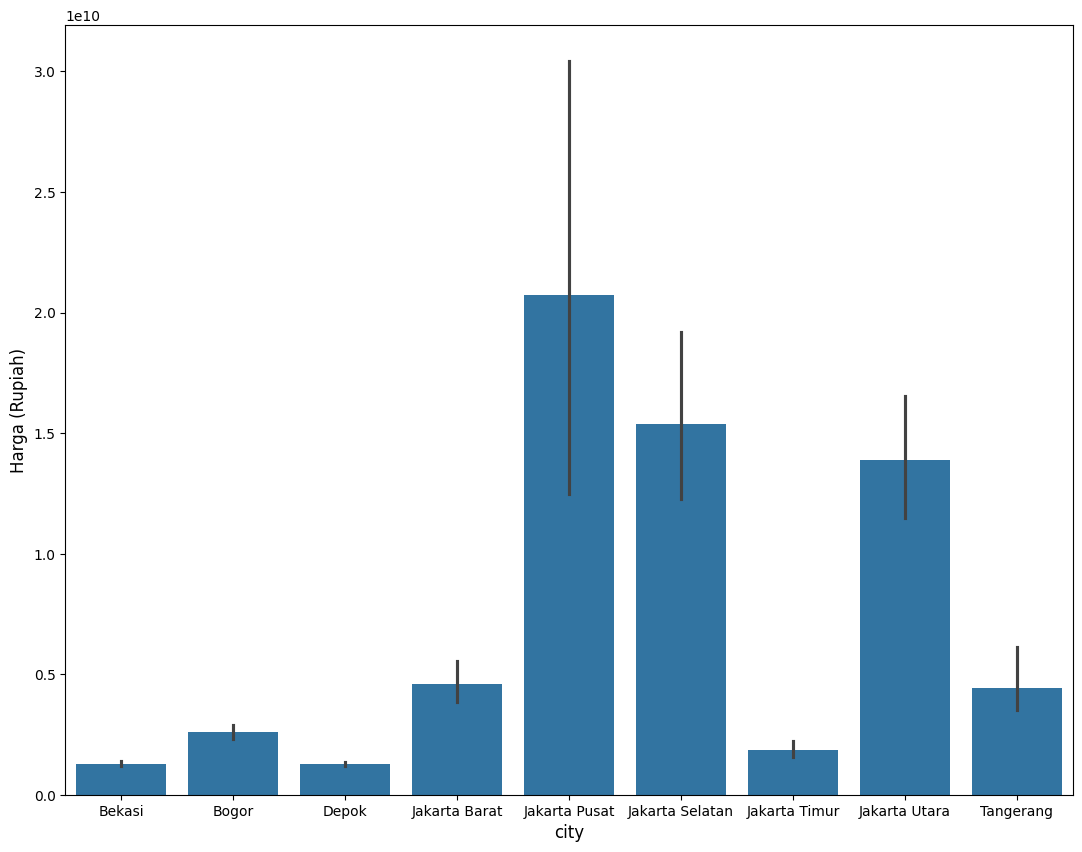

In [ ]:
plt.figure(figsize=(13, 10))  # Set the figure size

sns.barplot(x=df["city"], y=df["harga"])
plt.xlabel('city', fontsize=12)  # Set the x-axis label and font size
plt.ylabel('Harga (Rupiah)', fontsize=12)  # Set the y-axis label and font size

plt.show()

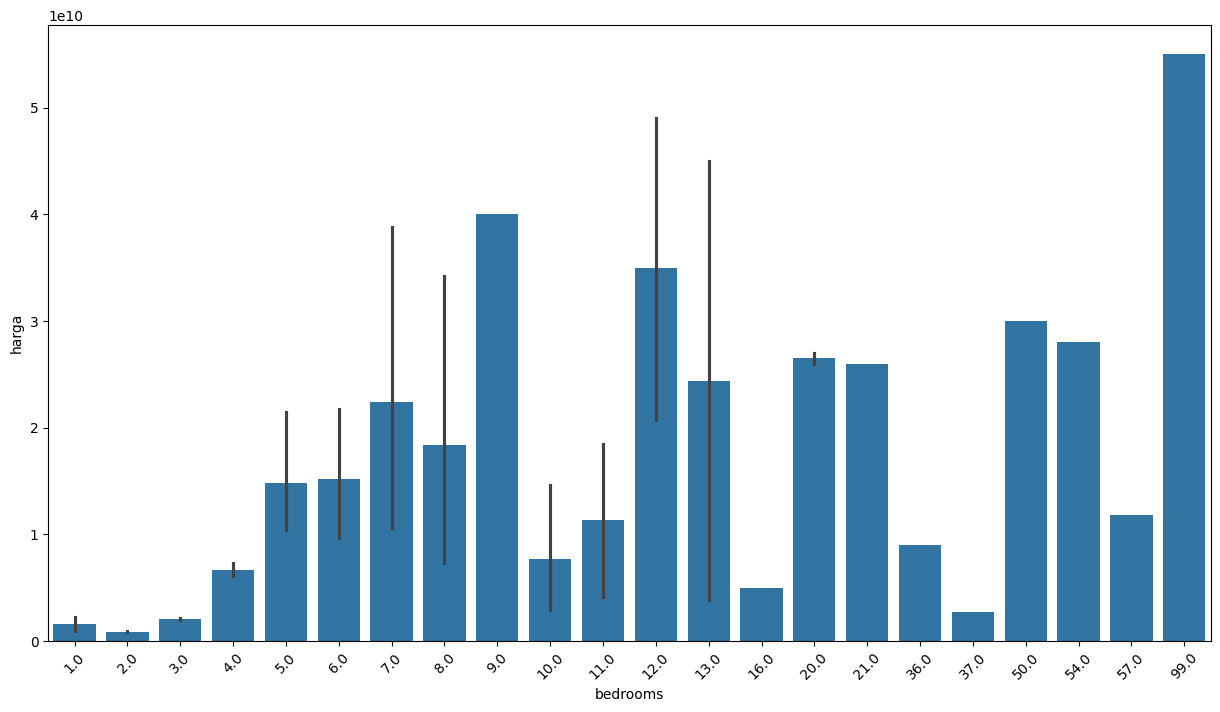

In [ ]:
plt.figure(figsize=(15, 8))  # Set the figure size

sns.barplot(x='bedrooms', y='harga', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


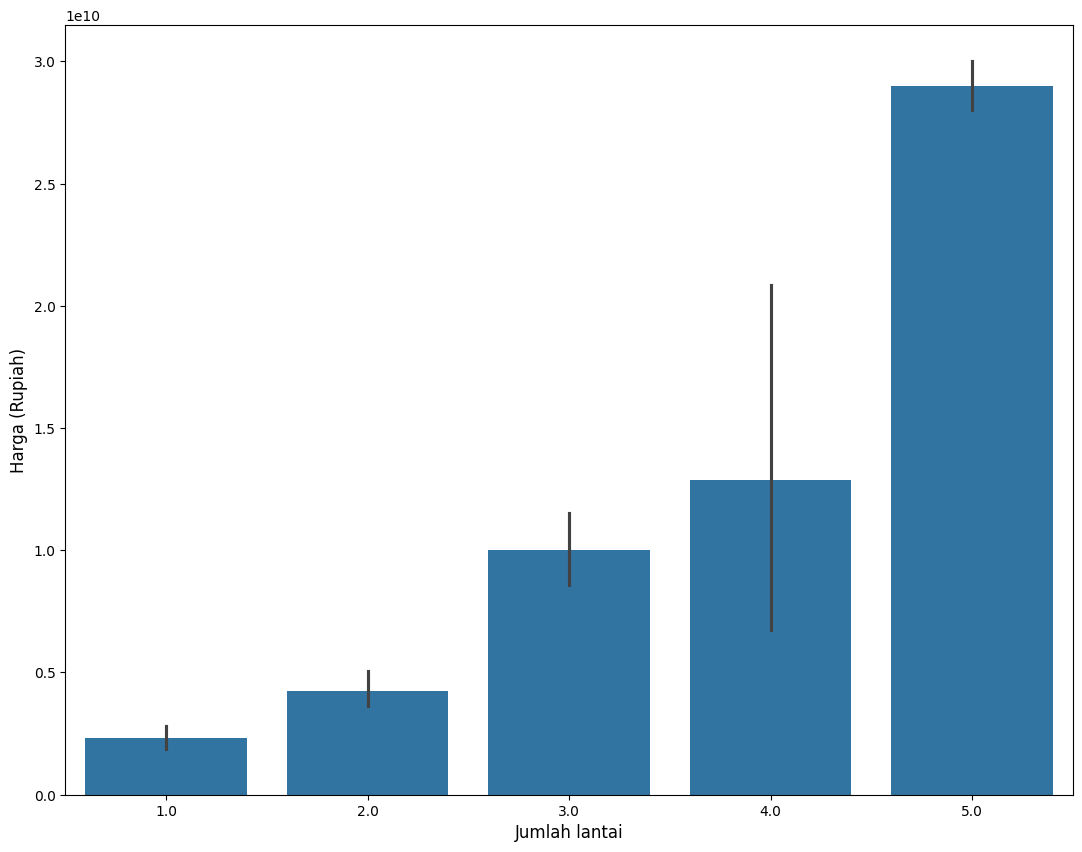

In [ ]:
plt.figure(figsize=(13, 10))  # Set the figure size

sns.barplot(x=df["floors"], y=df["harga"])
plt.xlabel('Jumlah lantai', fontsize=12)  # Set the x-axis label and font size
plt.ylabel('Harga (Rupiah)', fontsize=12)  # Set the y-axis label and font size

plt.show()

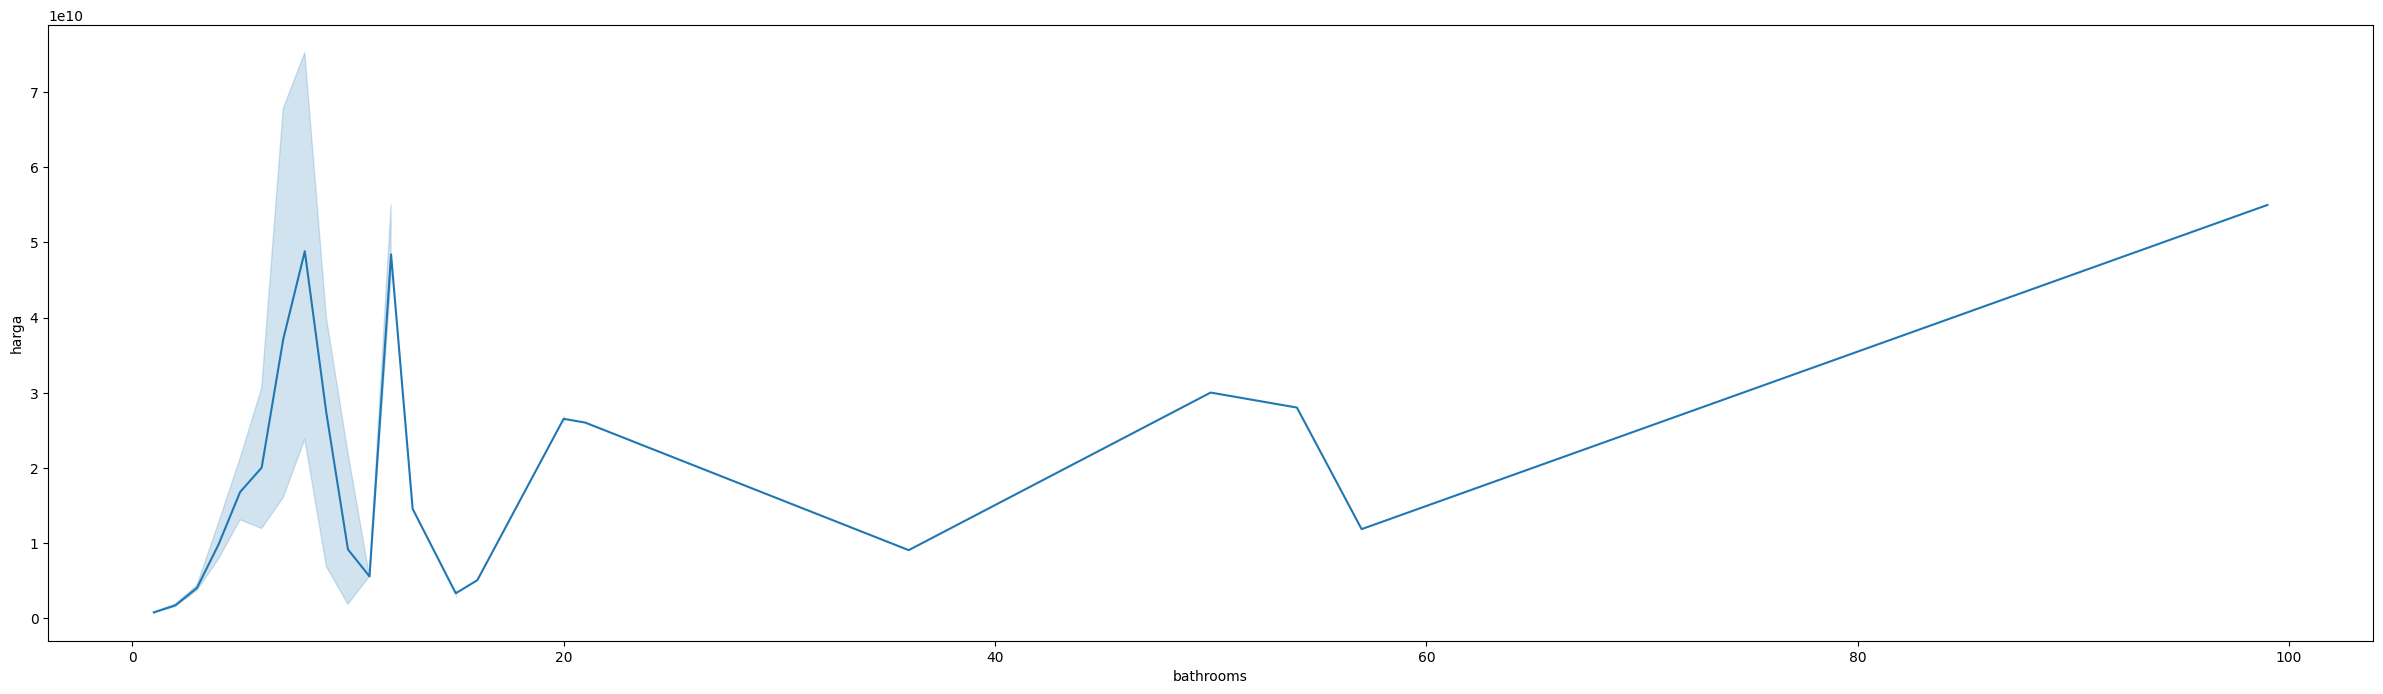

In [ ]:
plt.figure(figsize=(30, 8))  # Set the figure size

sns.lineplot(x=df['bathrooms'], y=df['harga'])
plt.show()

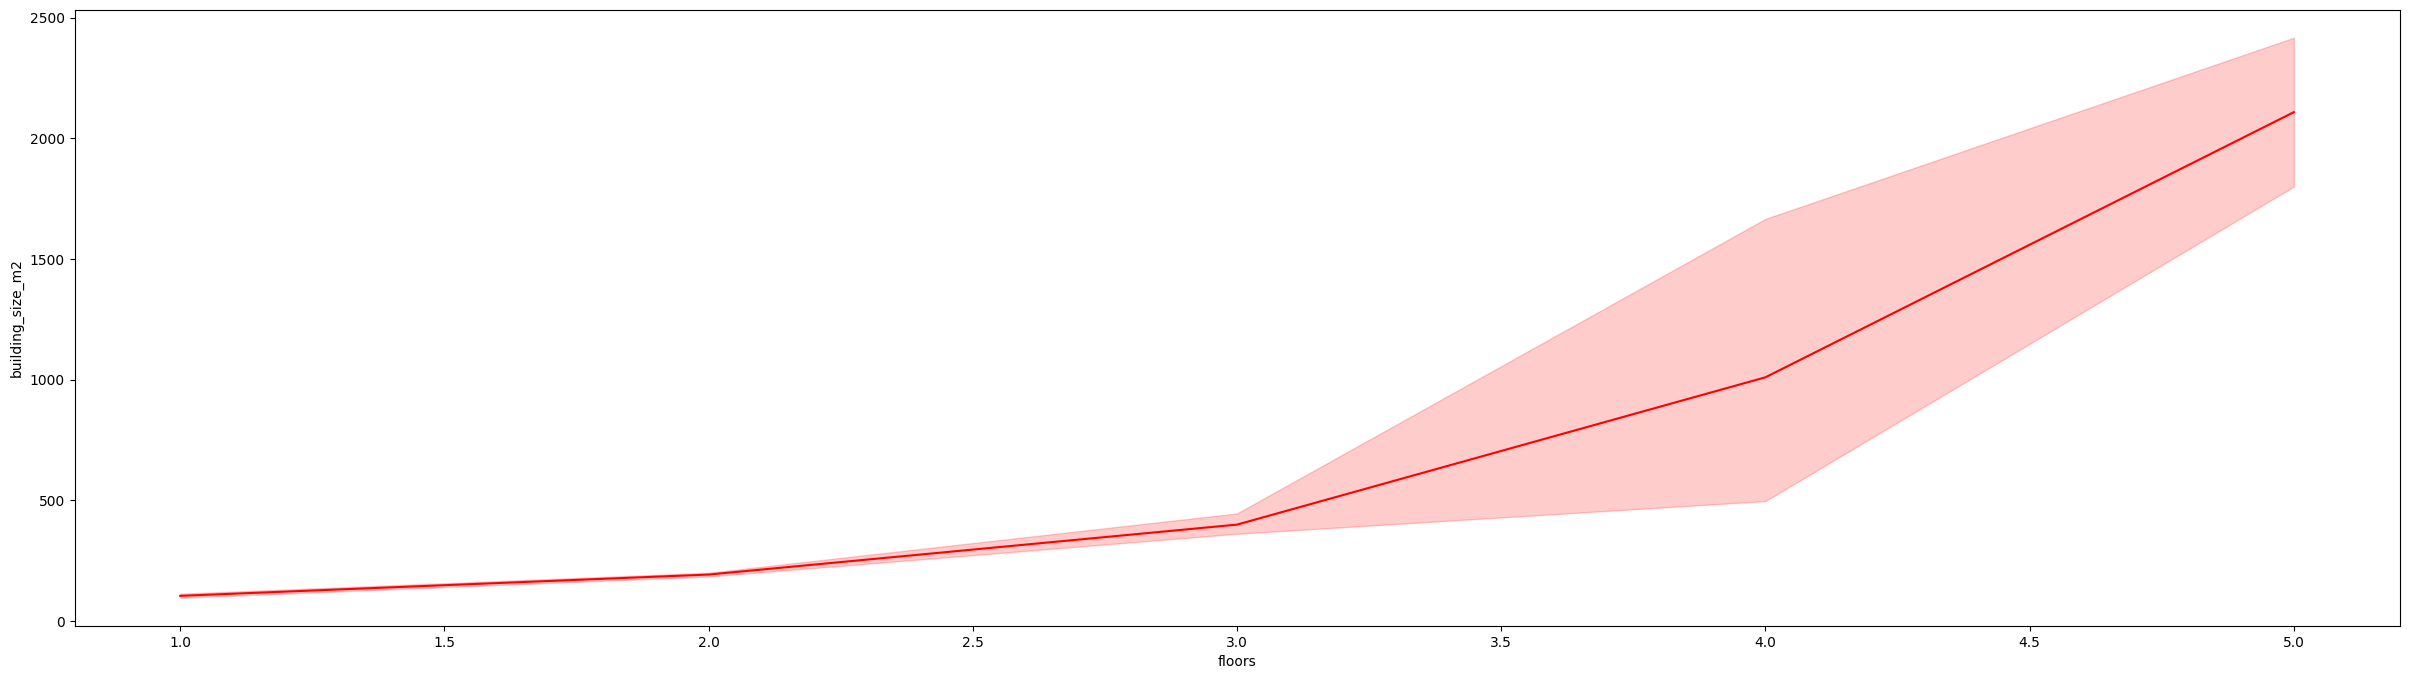

In [ ]:
plt.figure(figsize=(30,8))

sns.lineplot(x=df['floors'],y=df['building_size_m2'], color='red')
plt.show()

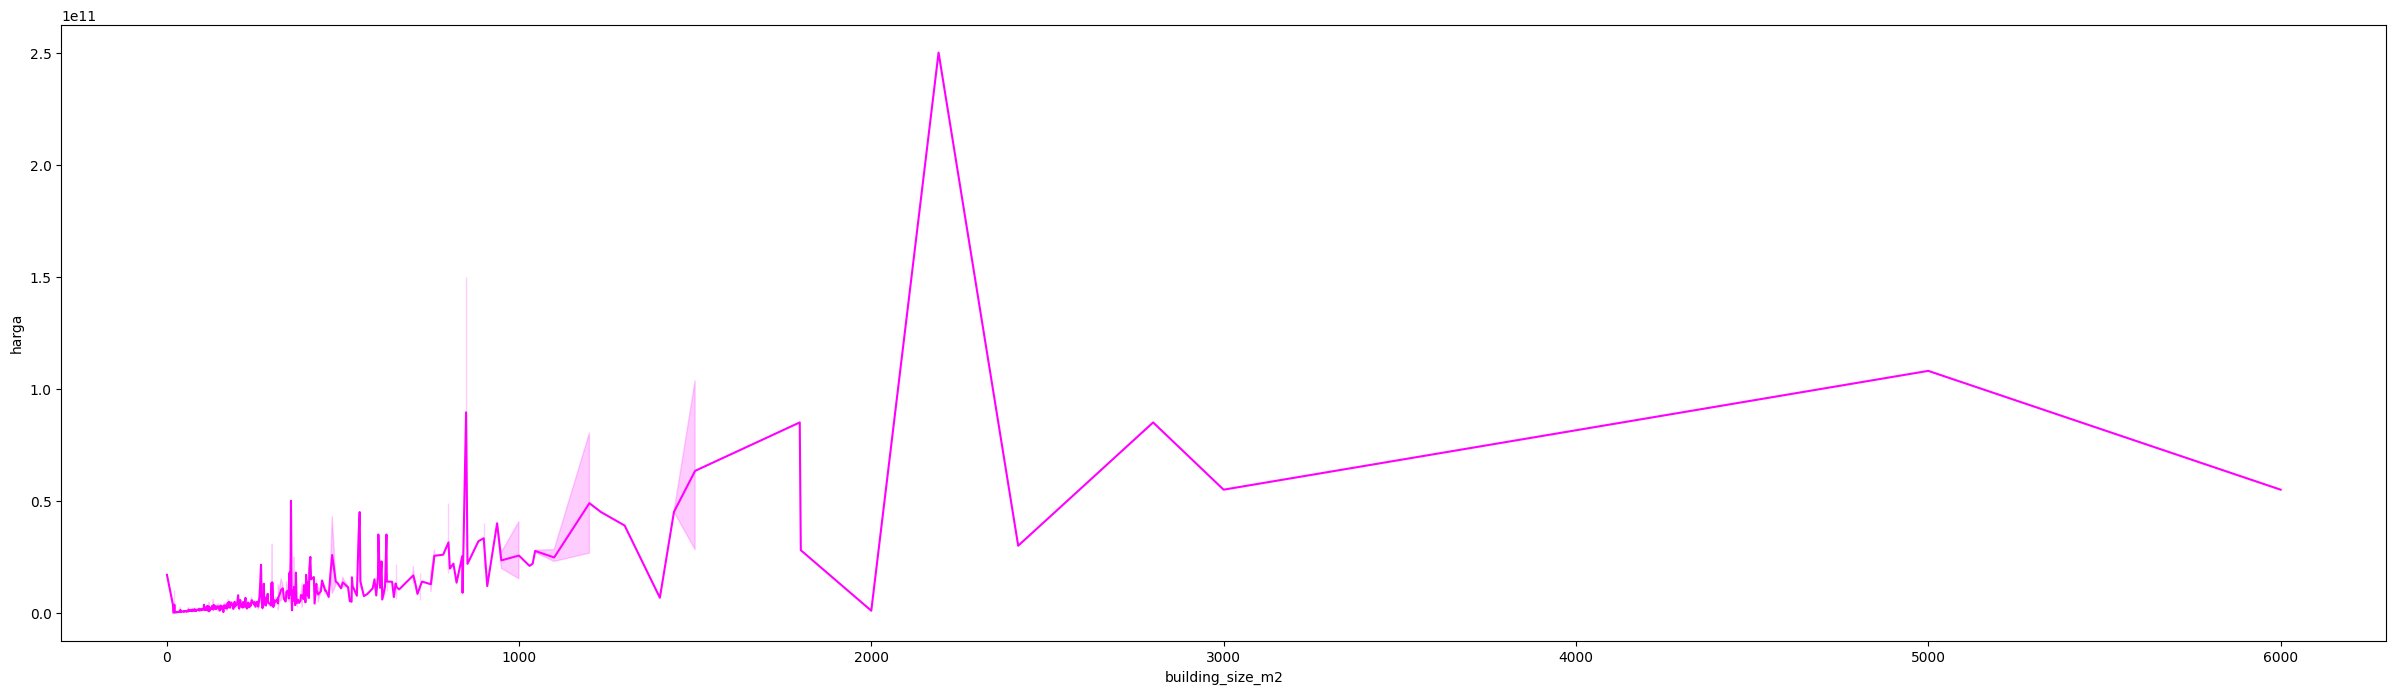

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x=df['building_size_m2'],y=df["harga"], color='magenta')
plt.show()

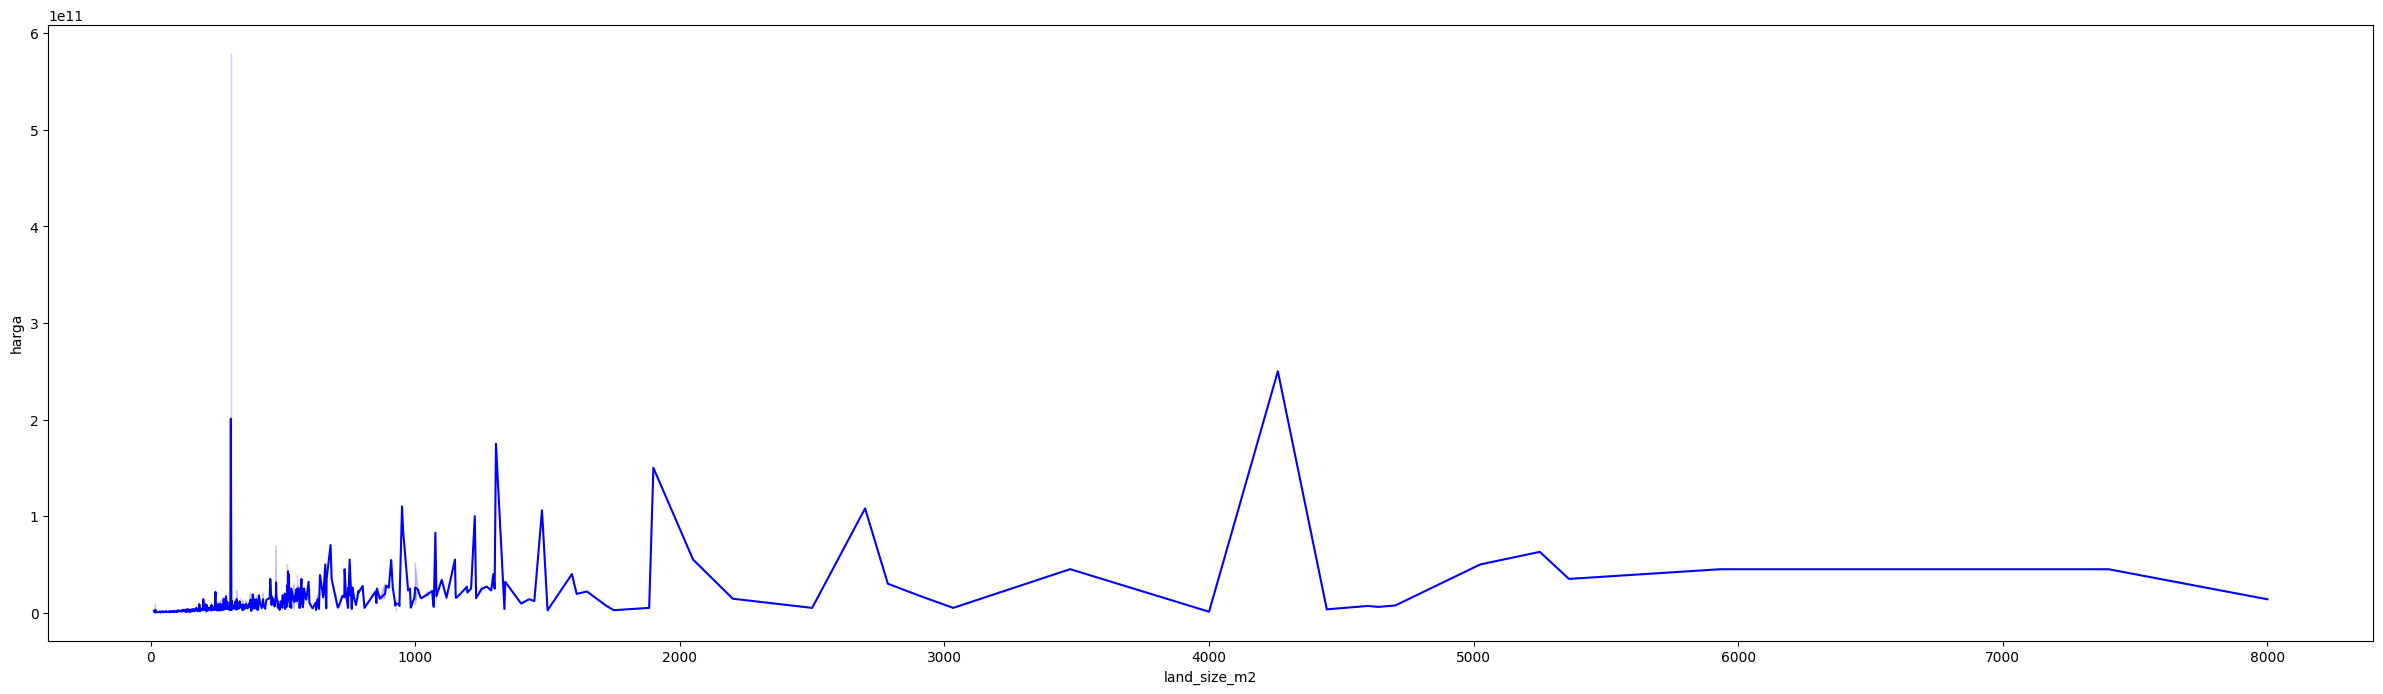

In [ ]:
plt.figure(figsize=(30,8))
sns.lineplot(x=df['land_size_m2'],y=df["harga"], color='blue')
plt.show()

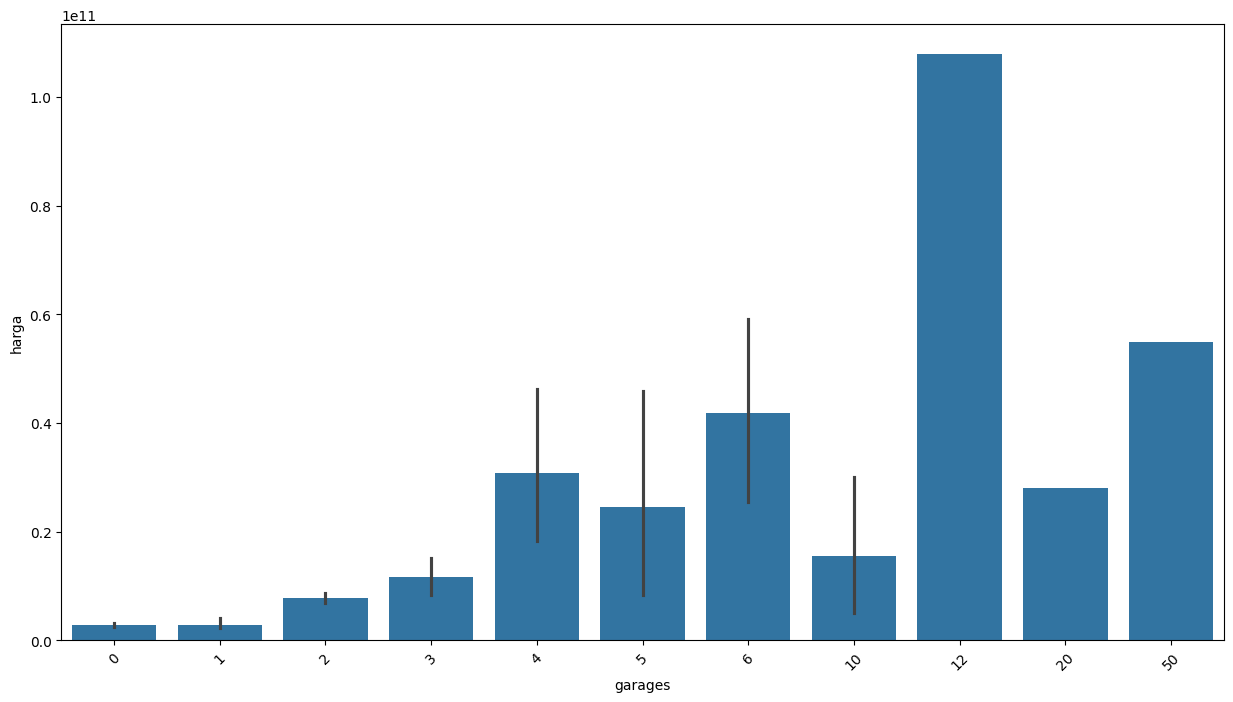

In [ ]:
plt.figure(figsize=(15, 8))  # Set the figure size

sns.barplot(x='garages', y='harga', data=df)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


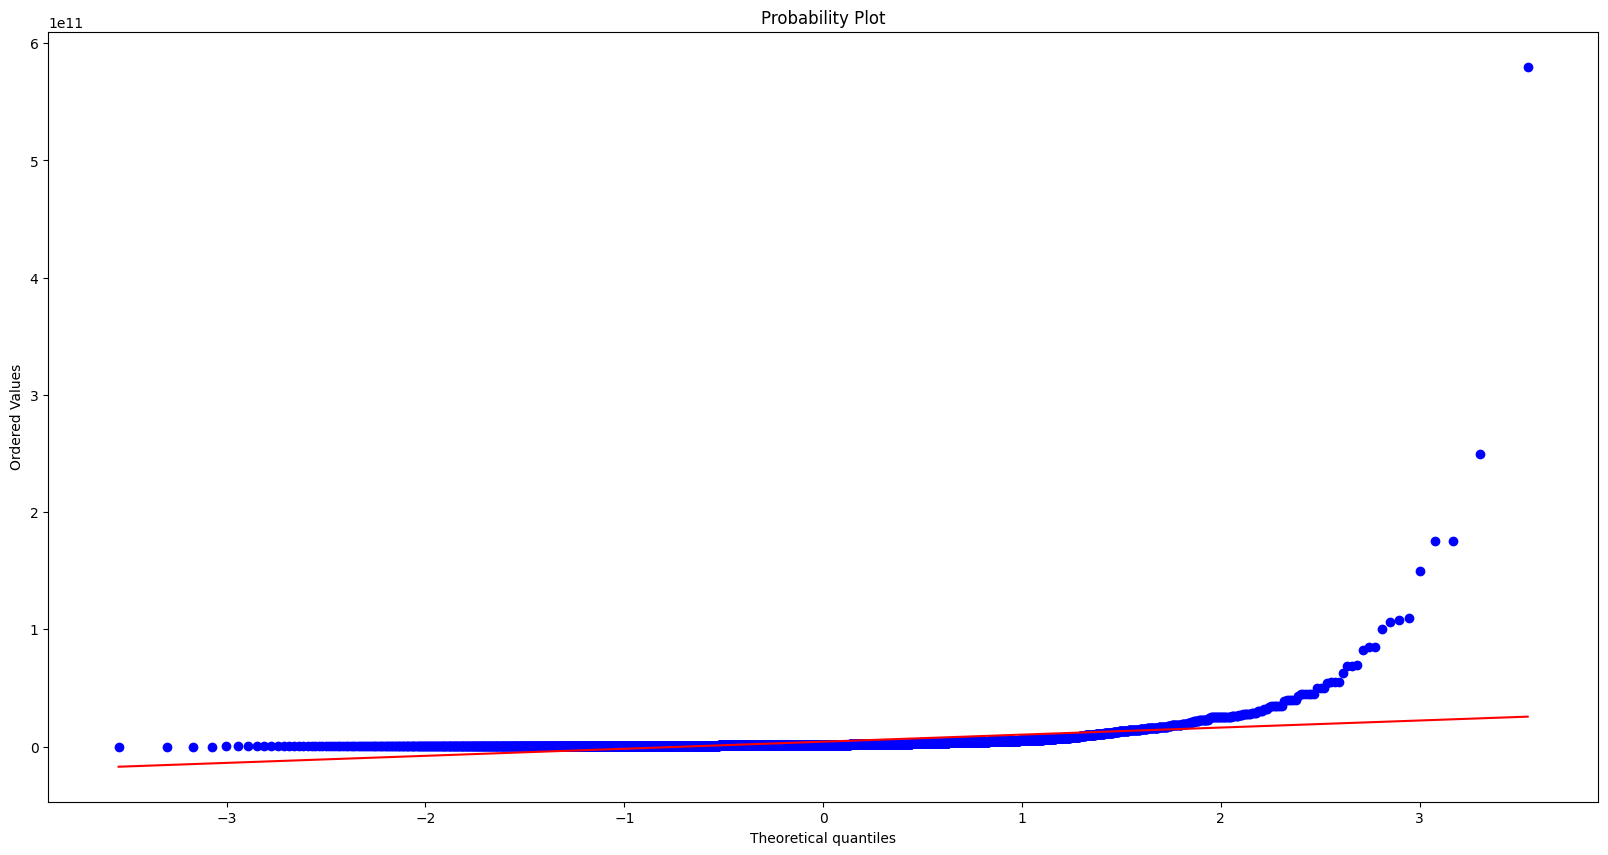

In [ ]:
# (probability plot) membandingkan distribusi data dengan distribusi teoritis tertentu.
stats.probplot(df['harga'], dist='norm', plot=py)
py.show()

**Pada kuantil atas dan bawah, titik-titik biru menjauhi garis merah yang berarti data tidak mengikuti garis normal. Namun, dari hasil plot di atas diperoleh garis-garis yang cenderung lurus yang berarti bahwa secara keseluruhan sebaran data variabel-variabel tersebut cenderung normal.**

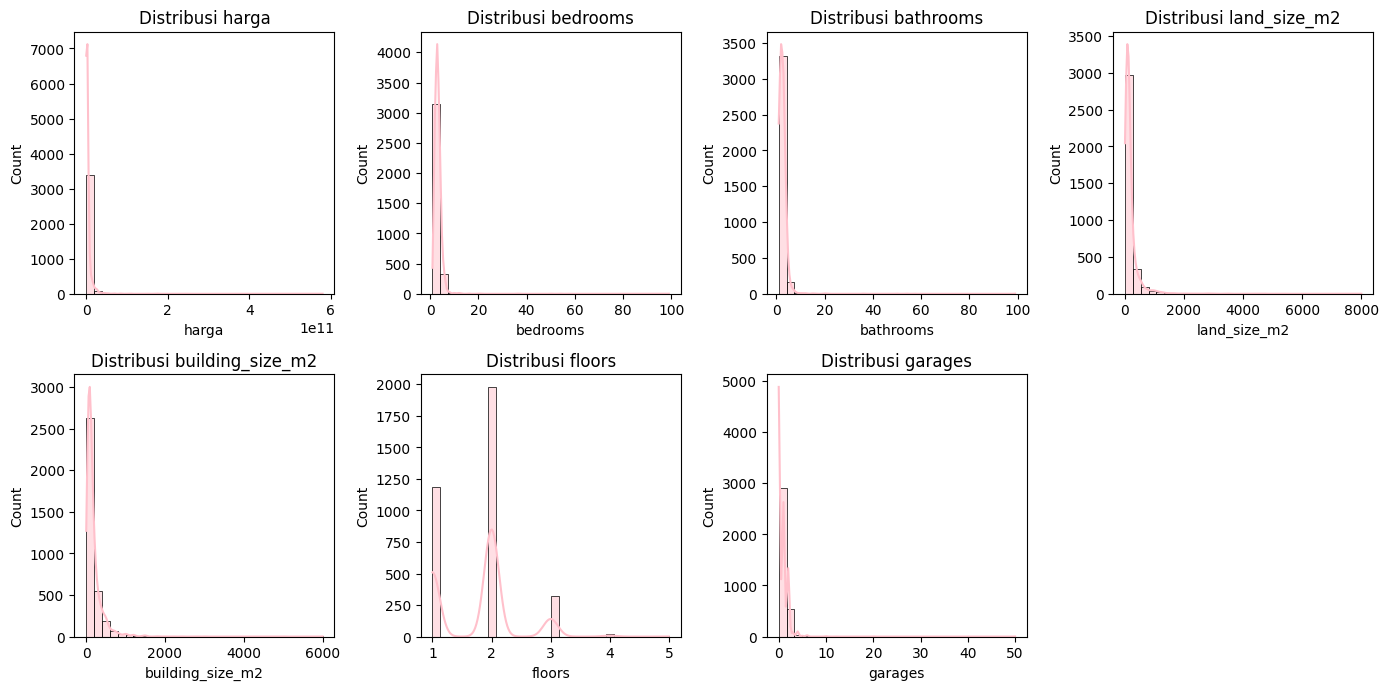

In [ ]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='pink')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

**1. Distribusi Harga (harga)**

Data harga memiliki distribusi yang sangat condong ke kiri (skewed to the right), menunjukkan bahwa mayoritas harga properti berada di rentang rendah. Hanya sedikit properti yang memiliki harga sangat tinggi, yang dapat dianggap sebagai outlier.

**2. Distribusi Jumlah Kamar Tidur (bedrooms)**

Sebagian besar properti memiliki jumlah kamar tidur yang kecil (1-5 kamar). Jumlah kamar tidur yang tinggi (di atas 20) sangat jarang dan bisa dianggap sebagai outlier.

**3. Distribusi Jumlah Kamar Mandi (bathrooms)**

Serupa dengan jumlah kamar tidur, distribusi jumlah kamar mandi juga condong ke kiri. Kebanyakan properti memiliki 1-5 kamar mandi, sementara jumlah kamar mandi yang sangat tinggi (di atas 20) adalah kasus langka.

**4. Distribusi Luas Tanah (land_size_m2)**

Luas tanah mayoritas berada di rentang kecil hingga menengah (0-1000 m²). Ada beberapa properti dengan luas tanah yang sangat besar (di atas 4000 m²), yang menjadi kandidat outlier.

**5. Distribusi Luas Bangunan (building_size_m2)**

Mayoritas properti memiliki luas bangunan kecil (0-1000 m²). Properti dengan luas bangunan sangat besar (di atas 2000 m²) adalah kasus yang jarang ditemukan dan berpotensi sebagai outlier.

**6. Distribusi Jumlah Lantai (floors)**

Data jumlah lantai menunjukkan pola yang lebih diskrit. Mayoritas properti memiliki 1-2 lantai, sedangkan jumlah lantai lebih dari 3 jarang terjadi.

**7. Distribusi Garasi (garages)**

Sebagian besar properti memiliki 0-2 garasi, sementara jumlah garasi yang sangat tinggi (di atas 10) sangat jarang dan dapat dikategorikan sebagai outlier.


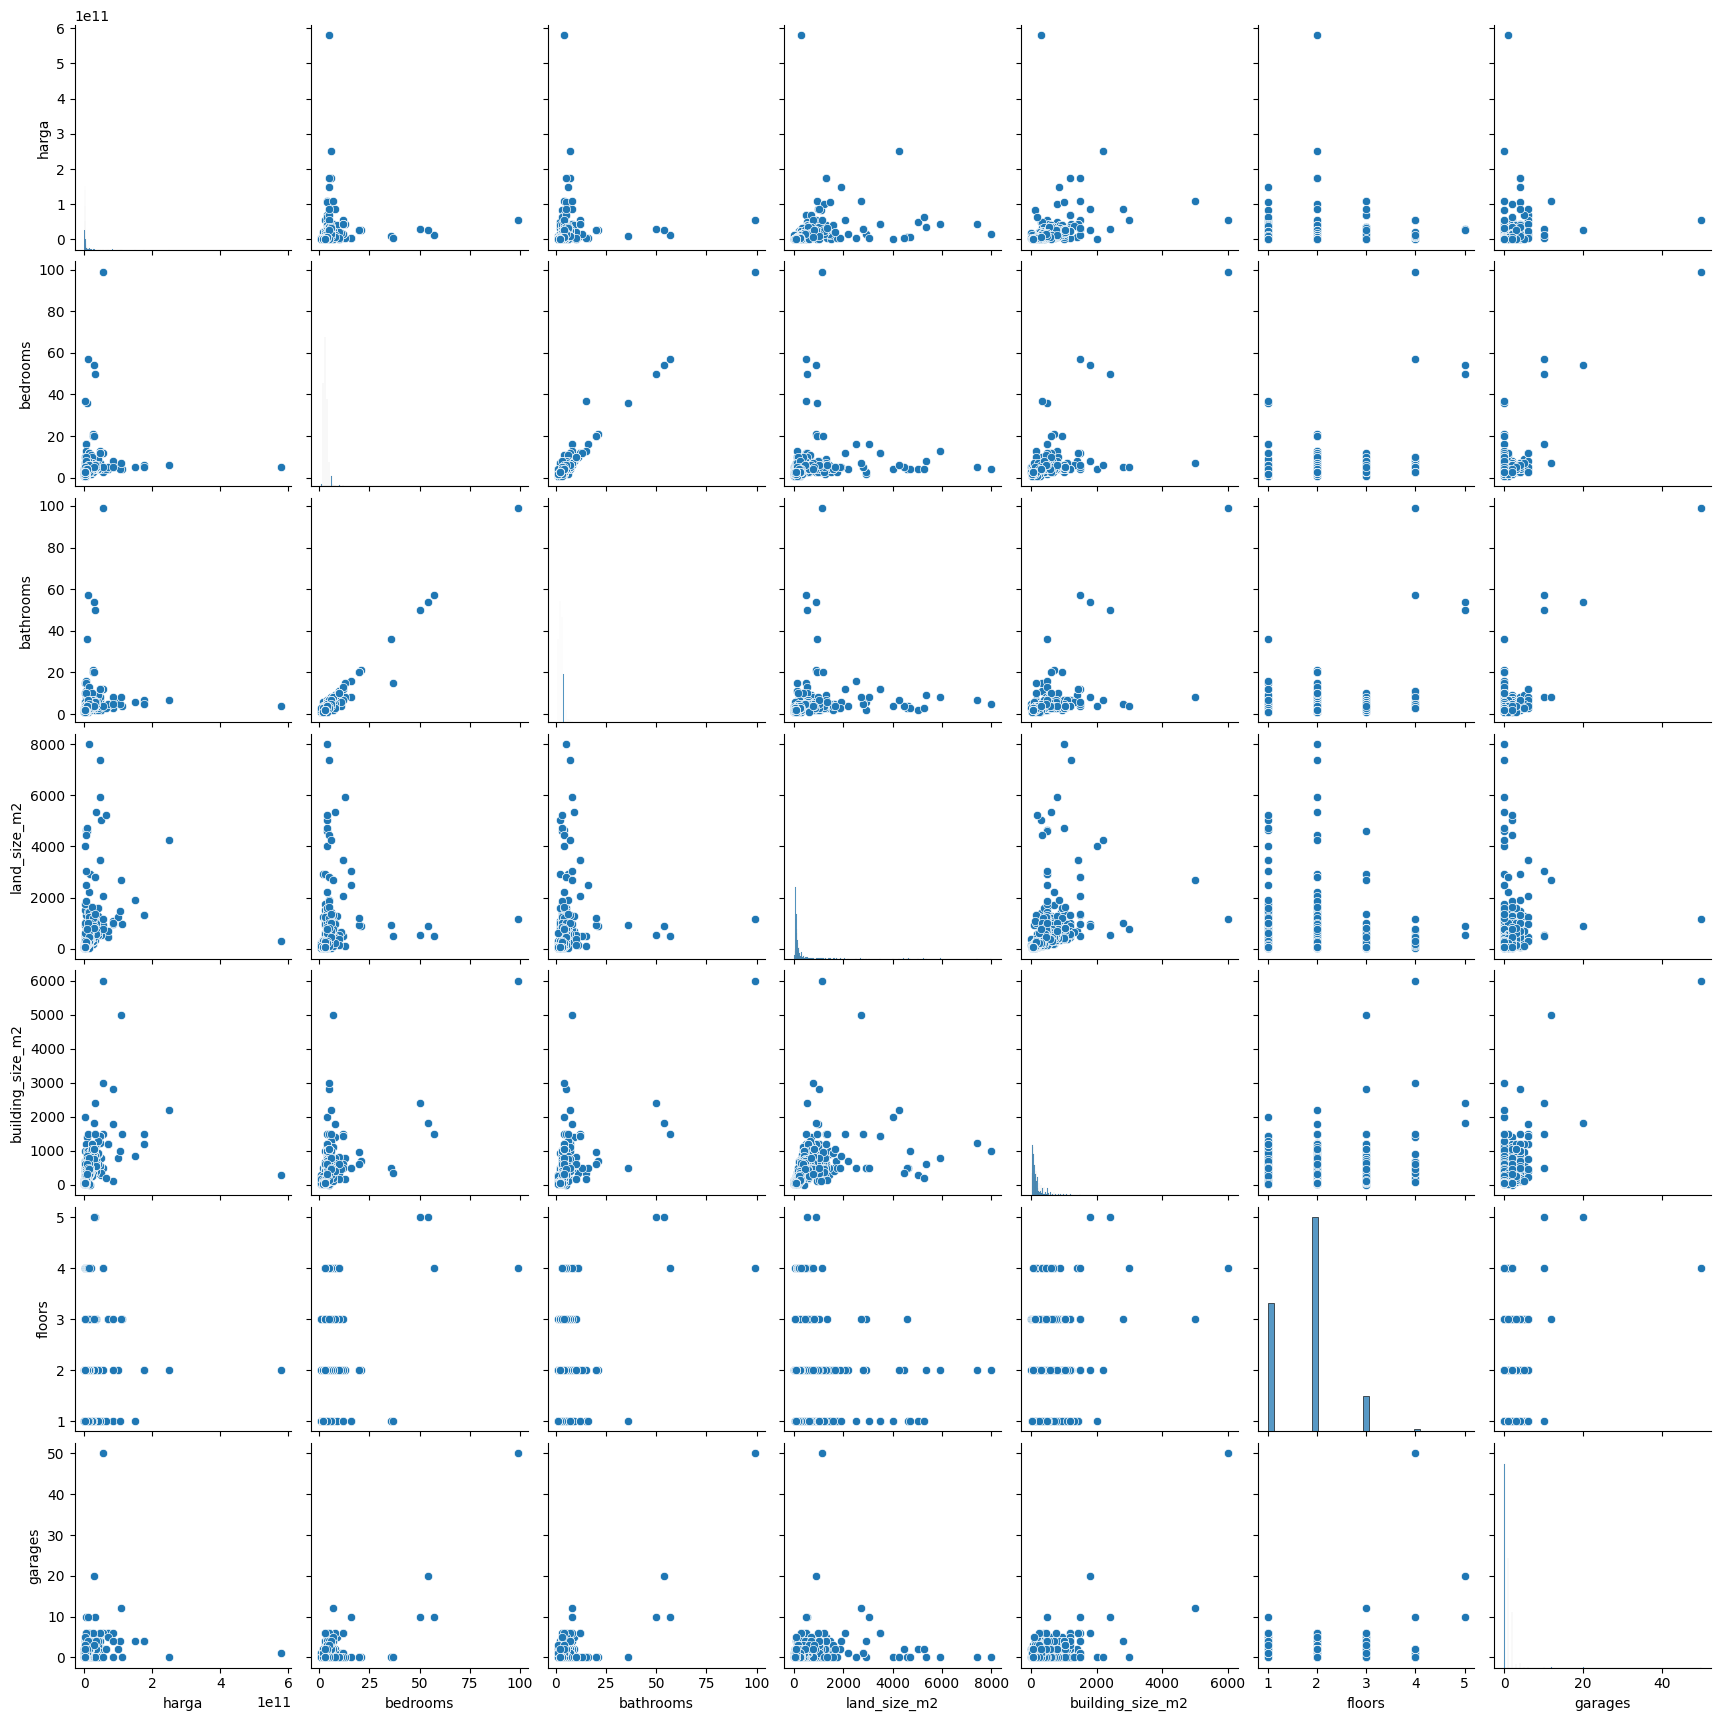

In [ ]:
sns.pairplot(df)

**Identify outliers**

In [ ]:
city_column = df['city']

In [ ]:
non_categorical_columns = df.select_dtypes(include=[np.number]).columns

In [ ]:
# mengecek fitur yang termasuk numerik
non_categorical_columns

Index(['harga', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2',
       'floors', 'garages'],
      dtype='object')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'harga'),
  Text(1, 0, 'bedrooms'),
  Text(2, 0, 'bathrooms'),
  Text(3, 0, 'land_size_m2'),
  Text(4, 0, 'building_size_m2'),
  Text(5, 0, 'floors'),
  Text(6, 0, 'garages')])

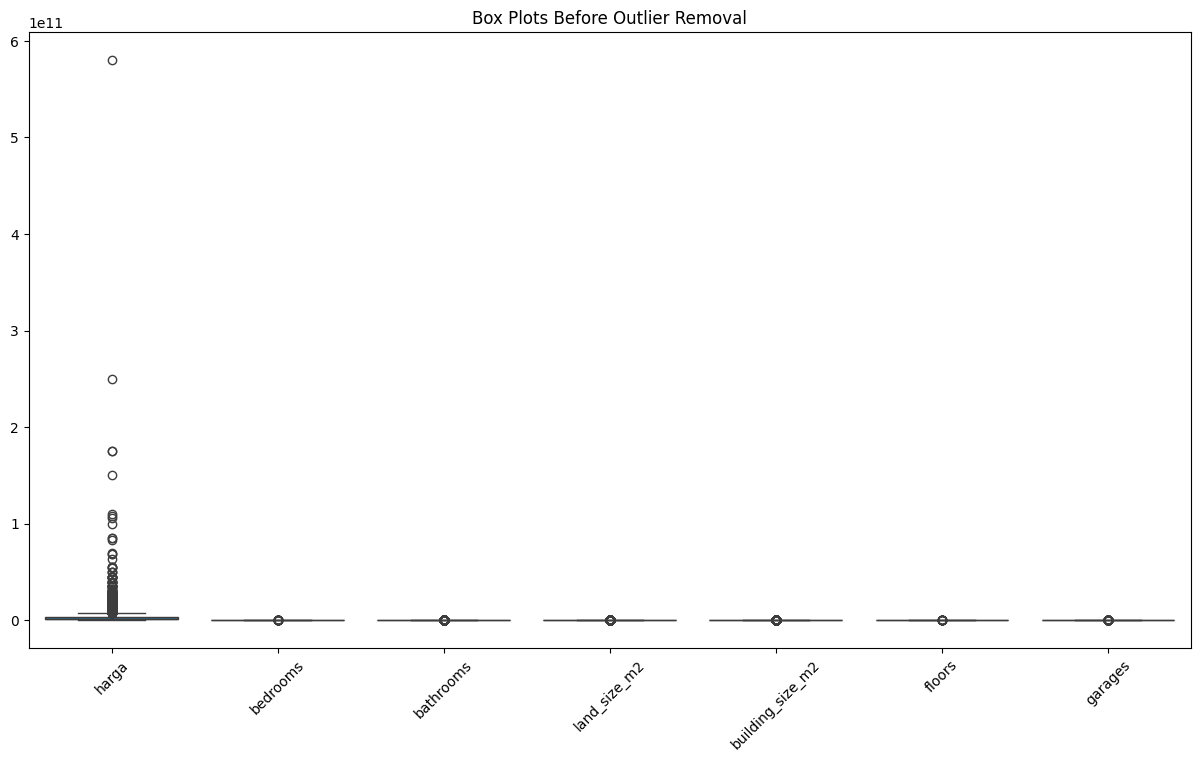

In [ ]:
# visualisasi box plots sebelum penghapusan outlier
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[non_categorical_columns])
plt.title('Box Plots Before Outlier Removal')
plt.xticks(rotation=45)

In [ ]:
""" Method 2 - Outliers Removal Using IQR
Fungsi ini menerima dua argumen df(dataset) dan Daftar nama kolom dalam DataFrame """

def remove_outliers_iqr(df, columns):
  # Membuat salinan DF untuk menghindari perubahan langsung pada dataset asli
  df_no_outliers = df.copy()
  # Iterasi melalui setiap kolom yang ingin diperiksa
  for col in columns:
    Q1 = df_no_outliers[col].quantile(0.25) # Changed 'column' to 'col'
    Q3 = df_no_outliers[col].quantile(0.75) # Changed 'column' to 'col'
    IQR = Q3 - Q1

    #definisikan batas bawah dan batas atas IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Terapkan batasan untuk menyaring outlier
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)] # Changed 'column' to 'col'
    # Kembalikan salinan DF yang tidak berisi outlier, Indentation corrected to be in line with the for loop
  return df_no_outliers

IQR Method (Interquartile Range Method) adalah teknik statistik yang digunakan untuk mendeteksi outlier dalam data. Outlier adalah data yang berada jauh di luar kisaran nilai normal atau rata-rata.

In [ ]:
  # menyimpan mennjadi dataset baru setelah penghapusan outlier
  df_iqr_removed = remove_outliers_iqr(df, non_categorical_columns)
  df_iqr_removed.to_csv('/content/drive/MyDrive/Colab Notebooks/df_iqr_removed.csv', index=False)

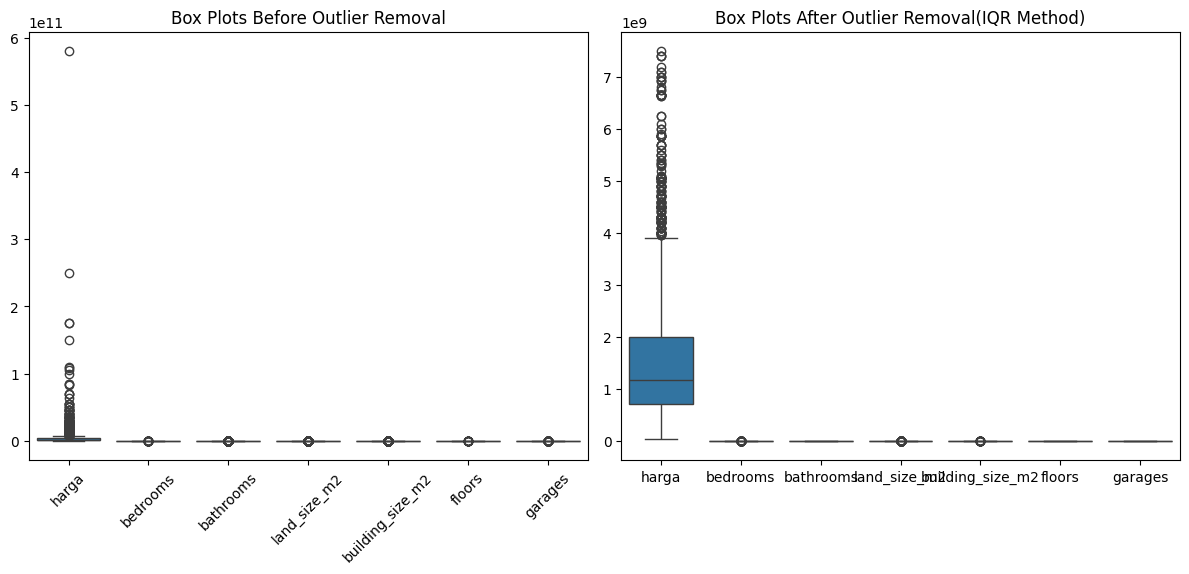

In [ ]:
# Visualisasi menjadi dataset baru setelah penghapusan outlier

# Baris ini mengatur ukuran figure (kanvas) yang akan digunakan untuk menggambar visualisasi.
plt.figure(figsize=(12, 6))

# Boxplot data asli sebelum penghapusan

""" digunakan untuk membuat beberapa plot (grafik) dalam satu figure (kanvas), yang terorganisir dalam bentuk grid.
plt.subplot(nrows, ncols, index)
nrows: Jumlah baris dalam grid.
ncols: Jumlah kolom dalam grid.
index: Posisi dari plot yang akan dibuat, dihitung dari kiri ke kanan, atas ke bawah. """

plt.subplot(1, 2, 1)

# boxplot dibuat untuk data setelah penghapusan outliers menggunakan metode IQR, yang terdapat dalam DataFrame df_iqr_removed, hanya untuk kolom numerik
sns.boxplot(data=df[non_categorical_columns])

# memberi judul
plt.title('Box Plots Before Outlier Removal')

# label pada sumbu x dirotasi sebanyak 45 derajat untuk memudahkan pembacaan.
plt.xticks(rotation=45)

# Boxplot setelah penghapusan metode IQR
#plot yang akan dibuat akan ditempatkan di posisi kedua dari grid yang terdiri dari 1 baris dan 2 kolom
plt.subplot(1, 2, 2)

# boxplot dibuat untuk data setelah penghapusan outliers menggunakan metode IQR, yang terdapat dalam DataFrame df_iqr_removed, hanya untuk kolom numerik
sns.boxplot(data=df_iqr_removed[non_categorical_columns])

# memberi judul
plt.title('Box Plots After Outlier Removal(IQR Method)')

# memastikan tata letak dari kedua subplot tidak tumpang tindih dan tampil lebih rapi dengan menyesuaikan ukuran dan ruang di antara plot.
plt.tight_layout()

plt.show()


**Boxplot Sebelum Penghapusan Outlier:**

1. Hampir semua fitur memiliki banyak outlier, yang terlihat jelas sebagai titik-titik di luar garis whisker.
2. Fitur harga menunjukkan adanya nilai-nilai yang sangat ekstrem (outlier besar) dengan skala hingga mendekati 6 × 10¹¹, yang secara signifikan mendominasi data.
3. Untuk fitur lain seperti bedrooms, bathrooms, land_size_m2, building_size_m2, floors, dan garages, meskipun nilai outlier ada, skala penyebarannya lebih kecil dibanding harga.

**Boxplot Setelah Penghapusan Outlier (Metode IQR):**

1. Setelah outlier dihilangkan, rentang data menjadi lebih terfokus pada nilai-nilai utama (tanpa nilai ekstrem yang mengganggu).
2. Fitur harga sekarang memiliki distribusi yang lebih terkonsentrasi di bawah 10⁹, dengan beberapa nilai masih terlihat sebagai outlier (namun jauh lebih sedikit dibanding sebelumnya).
3. Fitur lain (bedrooms, bathrooms, land_size_m2, building_size_m2, floors, dan garages) menunjukkan distribusi yang lebih bersih tanpa titik-titik outlier yang mencolok.

**Kesimpulan :**
Penghapusan outlier membantu mengurangi pengaruh nilai ekstrem yang dapat menyebabkan bias dalam model prediksi.

In [ ]:
df_iqr_removed['city'] = city_column.loc[df_iqr_removed.index]

In [ ]:
df.shape

(3510, 8)

In [ ]:
df_iqr_removed.shape

(2729, 8)

In [ ]:
df_iqr_removed.head()

,harga,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
0,2.990000e+09,Bekasi,4.0,4.0,239.0,272.0,2.0,0
1,1.270000e+09,Bekasi,3.0,2.0,55.0,69.0,2.0,0
2,1.950000e+09,Bekasi,3.0,3.0,119.0,131.0,2.0,1
3,3.300000e+09,Bekasi,3.0,3.0,180.0,174.0,2.0,2
5,2.700000e+09,Bekasi,3.0,3.0,136.0,200.0,2.0,1


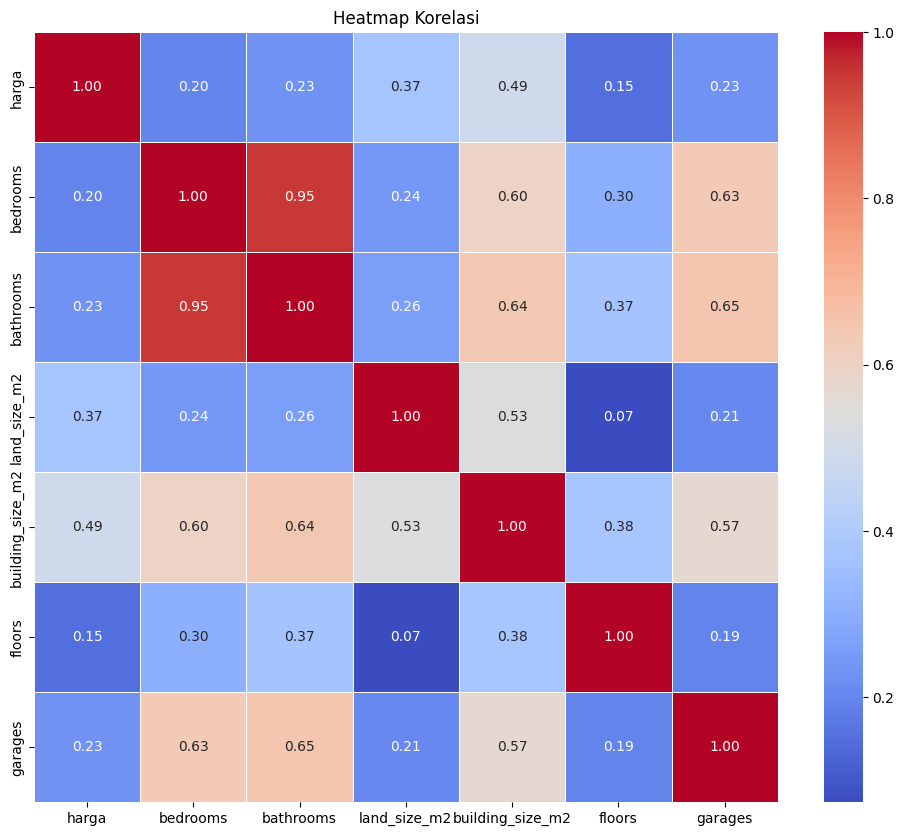

In [ ]:
#Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

**Lebih fokus pada visualisasi umum daripada nilai spesifik**

In [ ]:
print(df_iqr_removed.columns)

Index(['harga', 'city', 'bedrooms', 'bathrooms', 'land_size_m2',
       'building_size_m2', 'floors', 'garages'],
      dtype='object')


In [ ]:
df_iqr_removed_numeric = df_iqr_removed.select_dtypes(include=['number'])
correlation_matrix = df_iqr_removed_numeric.corr()
print(correlation_matrix)

                     harga  bedrooms  bathrooms  land_size_m2  \
harga             1.000000  0.520513   0.636346      0.637585   
bedrooms          0.520513  1.000000   0.677094      0.430732   
bathrooms         0.636346  0.677094   1.000000      0.429682   
land_size_m2      0.637585  0.430732   0.429682      1.000000   
building_size_m2  0.783206  0.669282   0.697412      0.692870   
floors            0.466024  0.511928   0.645836      0.123810   
garages           0.052523  0.085384   0.081492      0.077196   

                  building_size_m2    floors   garages  
harga                     0.783206  0.466024  0.052523  
bedrooms                  0.669282  0.511928  0.085384  
bathrooms                 0.697412  0.645836  0.081492  
land_size_m2              0.692870  0.123810  0.077196  
building_size_m2          1.000000  0.523789  0.067254  
floors                    0.523789  1.000000  0.075167  
garages                   0.067254  0.075167  1.000000  


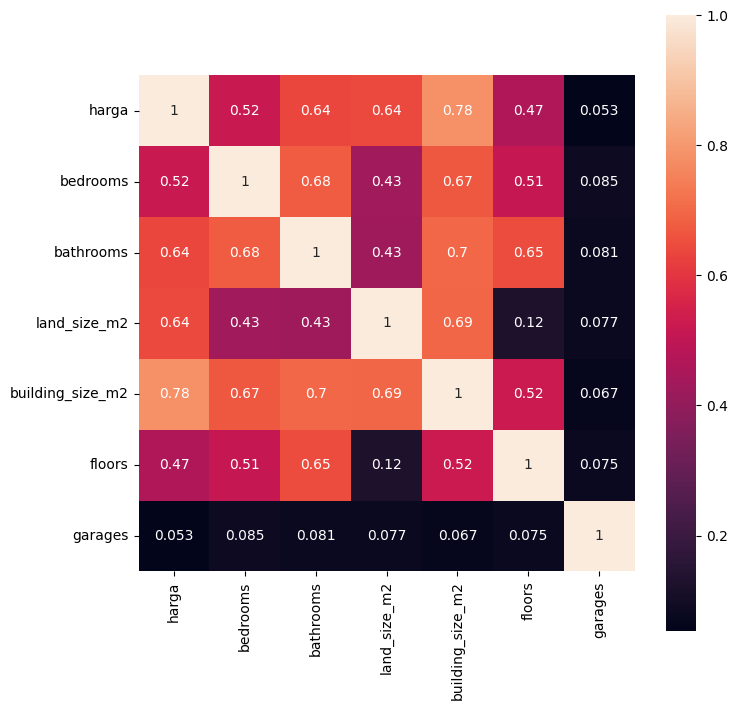

In [ ]:
C_mat = df_iqr_removed_numeric.corr()
fig = plt.figure(figsize = (8,8))

sns.heatmap(C_mat, square = True, annot=True)
plt.show()

**Faktor yang Paling Berpengaruh pada Harga Rumah (harga):**
1. building_size_m2 (Luas Bangunan) memiliki korelasi paling tinggi dengan harga rumah (0.78). Ini menunjukkan bahwa luas bangunan adalah faktor yang sangat berpengaruh terhadap harga rumah.
2. bathrooms (Jumlah Kamar Mandi) dan land_size_m2 (Luas Tanah) juga memiliki korelasi tinggi dengan harga rumah, masing-masing sebesar 0.64.
3. bedrooms (Jumlah Kamar Tidur) memiliki korelasi positif yang signifikan dengan harga rumah (0.52).

**Faktor dengan Pengaruh Rendah pada Harga Rumah:**

1. garages (Jumlah Garasi) memiliki korelasi sangat rendah dengan harga rumah (0.053). Ini menunjukkan bahwa jumlah garasi bukan faktor utama dalam menentukan harga rumah di dataset ini.
2. floors (Jumlah Lantai) juga memiliki korelasi yang relatif lebih rendah (0.47) dibandingkan faktor lainnya.

**Hubungan Antar-Fitur:**

1. building_size_m2 memiliki hubungan kuat dengan bathrooms (0.70) dan bedrooms (0.67). Hal ini logis karena rumah dengan bangunan lebih besar cenderung memiliki lebih banyak kamar tidur dan kamar mandi.
2. bathrooms dan bedrooms juga memiliki korelasi cukup tinggi (0.68), menunjukkan bahwa rumah dengan lebih banyak kamar tidur cenderung memiliki lebih banyak kamar mandi.

**Fitur yang Saling Tidak Berkorelasi:**
garages memiliki korelasi sangat rendah dengan semua fitur lain, menunjukkan bahwa jumlah garasi hampir tidak berhubungan dengan karakteristik rumah lainnya di dataset ini.

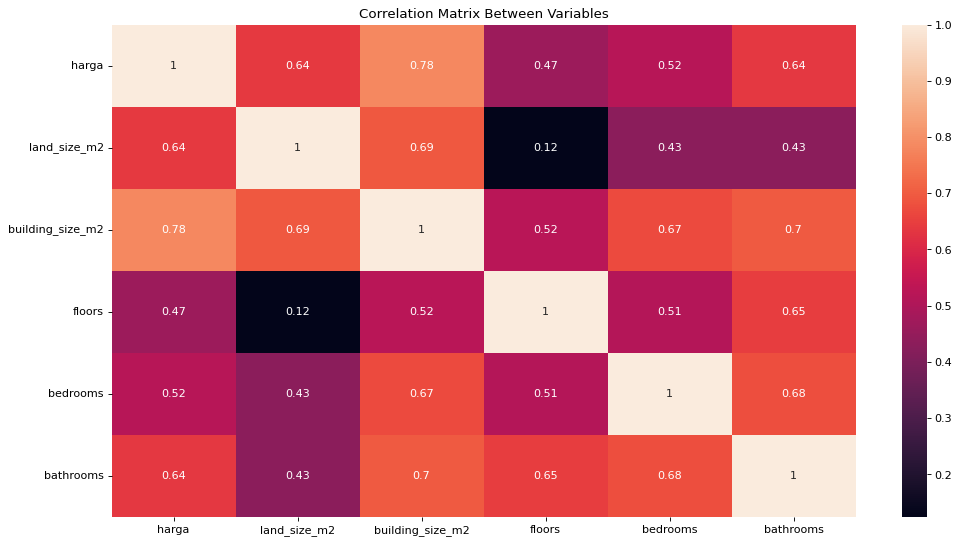

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8), dpi=80)
selected_columns = ['harga', 'land_size_m2', 'building_size_m2', 'floors', 'bedrooms','bathrooms']  # Kolom spesifik
sns.heatmap(
    df_iqr_removed[selected_columns].corr(),  # Korelasi kolom terpilih
    cmap='rocket',
    annot=True
)
plt.title('Correlation Matrix Between Variables')
plt.show()


# **Data Preparation**

Feature Encoding

In [ ]:
df_iqr_removed.groupby('city')['city'].count()

,city
city,
Bekasi,533
Bogor,659
Depok,495
Jakarta Barat,150
Jakarta Pusat,19
Jakarta Selatan,75
Jakarta Timur,88
Jakarta Utara,47
Tangerang,663


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [ ]:
# Buat instance LabelEncoder
label_encoder = LabelEncoder()

# List kolom kategorikal yang perlu di-encode
categorical_columns = ['city']

# Encode kolom kategorikal
for column in categorical_columns:
    df_iqr_removed[column] = label_encoder.fit_transform(df_iqr_removed[column])

# Tampilkan DataFrame untuk memastikan encoding telah diterapkan
df_iqr_removed.head()

,harga,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
0,2.990000e+09,0,4.0,4.0,239.0,272.0,2.0,0
1,1.270000e+09,0,3.0,2.0,55.0,69.0,2.0,0
2,1.950000e+09,0,3.0,3.0,119.0,131.0,2.0,1
3,3.300000e+09,0,3.0,3.0,180.0,174.0,2.0,2
5,2.700000e+09,0,3.0,3.0,136.0,200.0,2.0,1


Label Encoding diterapkan untuk mengonversi kolom kategori menjadi nilai numerik. Hal ini dilakukan agar algoritma pembelajaran mesin dapat memahami data kategori.

In [ ]:
df_iqr_removed.groupby('city')['city'].count()

,city
city,
0,533
1,659
2,495
3,150
4,19
5,75
6,88
7,47
8,663


In [ ]:
df_iqr_removed.tail()

,harga,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
3548,588000000.0,8,2.0,1.0,72.0,36.0,1.0,1
3549,785000000.0,8,3.0,2.0,85.0,60.0,2.0,0
3550,755000000.0,8,3.0,2.0,78.0,60.0,2.0,0
3551,800000000.0,8,3.0,2.0,60.0,65.0,2.0,0
3552,655000000.0,8,3.0,2.0,64.0,60.0,2.0,2


Data Splitting

In [ ]:
x = df_iqr_removed.drop('harga', axis=1)
y = df_iqr_removed[['harga']]

1. x adalah dataframe yang berisi fitur-fitur (predictor) setelah kolom target (harga) dihapus.
2. y adalah dataframe yang hanya berisi kolom target (harga), yaitu nilai yang ingin diprediksi.

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=0)
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)

x_train : (1910, 7)
x_test : (819, 7)
y_train : (1910, 1)
y_test : (819, 1)


Data telah berhasil dipisahkan menjadi training set (70%) dan test set (30%) menggunakan train_test_split.

In [ ]:
x_train[:5]

,city,bedrooms,bathrooms,land_size_m2,building_size_m2,floors,garages
2511,6,3.0,3.0,210.0,180.0,1.0,0
924,1,3.0,2.0,116.0,85.0,1.0,1
1516,2,5.0,2.0,83.0,154.0,2.0,0
834,1,4.0,3.0,216.0,180.0,2.0,1
2363,5,3.0,3.0,240.0,280.0,2.0,0


In [ ]:
y_test.tail()

,harga
1789,2.520000e+09
1044,4.500000e+08
580,1.150000e+09
3277,6.300000e+08
1548,8.500000e+08


# **Feature Scaling**

Feature scaling membantu dalam:

1. Menyeimbangkan kontribusi fitur dalam model.
2. Mempercepat pelatihan model.
3. Meningkatkan stabilitas dan akurasi prediksi.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [ ]:
x_train[:5]

array([[ 0.9199165 ,  0.18404113,  1.0419029 ,  2.29105017,  1.30511802,
        -1.11515315, -0.75855443],
       [-0.69947568,  0.18404113, -0.09331361,  0.25846062, -0.31443078,
        -1.11515315,  0.77949118],
       [-0.37559724,  2.60830701, -0.09331361, -0.45510805,  0.86187309,
         0.63500504, -0.75855443],
       [-0.69947568,  1.39617407,  1.0419029 ,  2.42078993,  1.30511802,
         0.63500504,  0.77949118],
       [ 0.59603806,  0.18404113,  1.0419029 ,  2.93974897,  3.00990623,
         0.63500504, -0.75855443]])

In [ ]:
np.set_printoptions(suppress=True)
print(x_train[:5])
print(y_train[:5])

[[ 0.9199165   0.18404113  1.0419029   2.29105017  1.30511802 -1.11515315
  -0.75855443]
 [-0.69947568  0.18404113 -0.09331361  0.25846062 -0.31443078 -1.11515315
   0.77949118]
 [-0.37559724  2.60830701 -0.09331361 -0.45510805  0.86187309  0.63500504
  -0.75855443]
 [-0.69947568  1.39617407  1.0419029   2.42078993  1.30511802  0.63500504
   0.77949118]
 [ 0.59603806  0.18404113  1.0419029   2.93974897  3.00990623  0.63500504
  -0.75855443]]
[[ 1.21895184]
 [-0.6185894 ]
 [-0.40473762]
 [ 0.58531693]
 [ 1.29815621]]


In [ ]:
print(x_train.min())
print(x_train.max())

-2.2402247597039255
5.032572902111086


In [ ]:
print(y_train.min())
print(y_train.max())

-1.2031176068103686
4.703943861242966


In [ ]:
print(x_test[:5])
print(y_test[:5])

[[-0.72320289  1.42690254  0.96546024  0.90748294  1.1377208   0.52671591
  -0.74516252]
 [-0.72320289  0.1524934  -0.18383037 -0.5589259  -0.76750369  0.52671591
   0.72541122]
 [-1.04215991 -1.12191573 -1.33312097 -0.79967959 -0.81946436 -1.21976317
   0.72541122]
 [ 1.50949619  2.70131167  2.11475084  0.90748294  2.99098463  2.27319499
  -0.74516252]
 [ 1.50949619  2.70131167  2.11475084  0.90748294  2.99098463  2.27319499
   2.19598497]]
[[ 0.03863965]
 [-0.66369944]
 [-1.01909994]
 [ 4.32036953]
 [ 4.32036953]]


# **Modeling**

Pada proyek ini, digunakan 2 algoritma untuk pemodelan yaitu **Algoritma Gradient boosting dan Linear Regression**. Untuk setiap model akan diterapkan **tuning hyperparameter** untuk meningkatkan performa model berdasarkan R2-score.

Untuk menemukan parameter terbaik akan menggunakan **Grid Search CV atau Randomized Search CV**, tergantung bagaimana algoritma bekerja.

Cross-validation (CV) adalah prosedur resampling yang digunakan untuk mengevaluasi model pembelajaran mesin pada sampel data yang terbatas. Prosedur memiliki parameter tunggal yang disebut k yang akan dipecah menjadi sampel data yang diberikan.

Dengan demikian, prosedur ini sering disebut **k-fold cross-validation**. Untuk mengecek bagaimana prediksi model, akan direpresentasikan visualisasi berupa gambar grafik distplot dari hasil estimasi algoritma dengan data asli. Nantinya akan dilakukan evaluasi untuk menentukan algoritma terbaik dari dua algoritma yang akan dipilih.


In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Gradient Boosting

Gradient Boosting Regressor memberikan model prediksi dalam bentuk ansambel model prediksi lemah, yang biasanya merupakan pohon keputusan.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
GBReg = GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=0)
GBReg.fit(x_train, y_train.ravel())

GradientBoostingRegressor(max_depth=5, n_estimators=200, random_state=0)

Konfigurasi ini adalah pengaturan dasar dengan fokus pada parameter utama seperti jumlah estimator (n_estimators) dan kedalaman pohon (max_depth).

Parameter yang digunakan:

1. n_estimators=200: Jumlah total pohon dalam model ditetapkan sebanyak 200.
2. max_depth=5: Kedalaman maksimum setiap pohon adalah 5.
3. random_state=0: Untuk memastikan hasil yang konsisten setiap kali kode dijalankan.

In [ ]:
ypred_GBReg = sc.inverse_transform(GBReg.predict(x_test).reshape(-1,1))
y_pred_GBReg = pd.DataFrame(ypred_GBReg)
y_pred_GBReg.tail()

,0
814,2.430034e+09
815,5.832513e+08
816,1.194494e+09
817,6.732138e+08
818,7.750078e+08


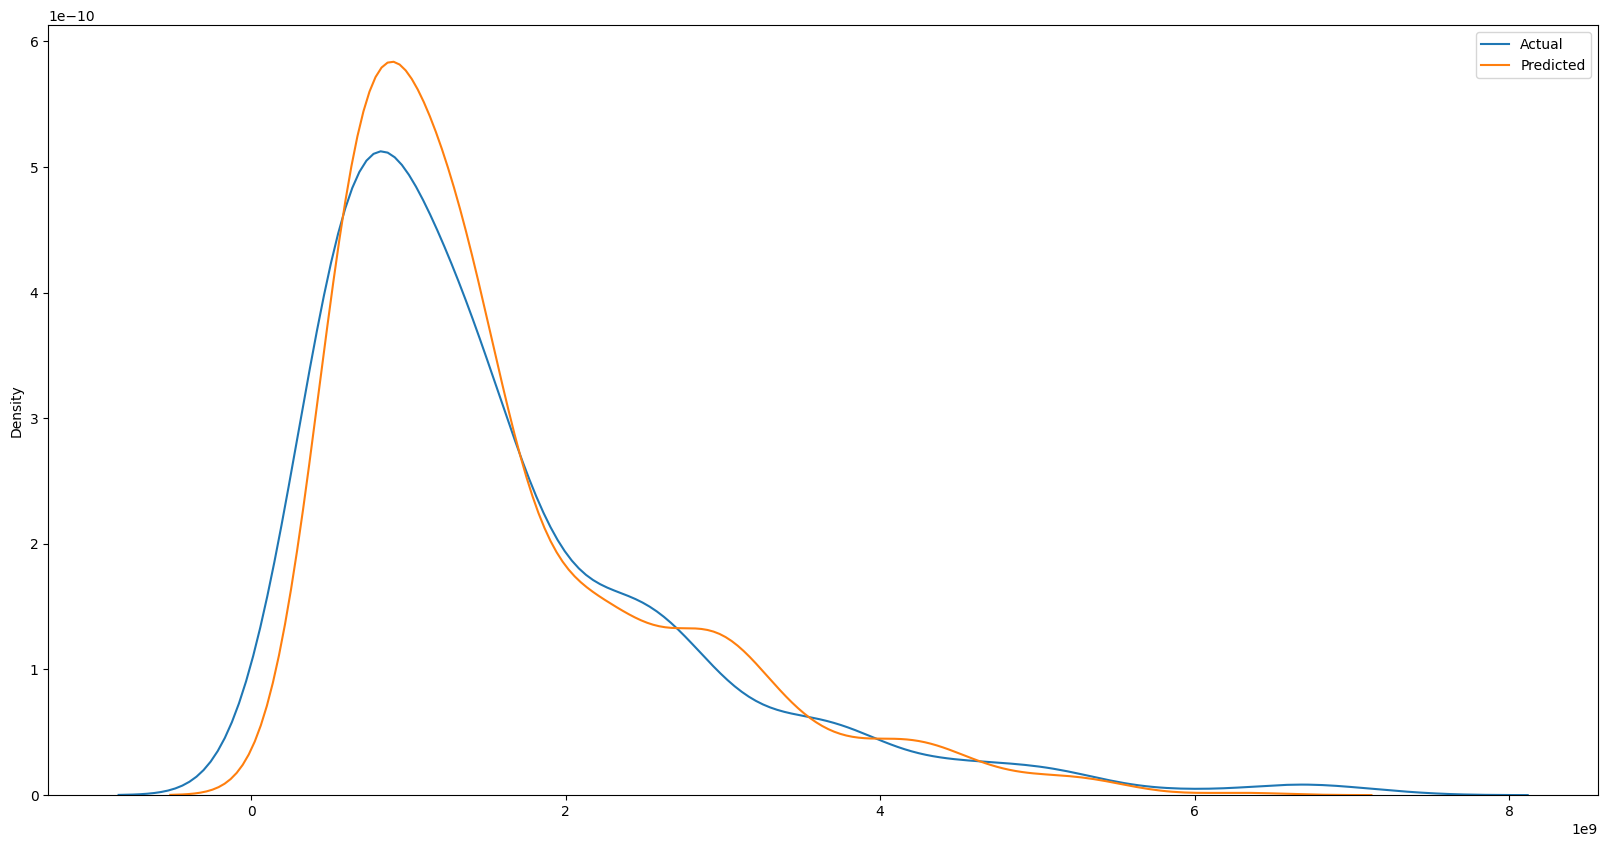

In [ ]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(y_pred_GBReg,hist=False,label='Predicted')
plt.legend()

In [ ]:
print('Gradient Boosting Regression')
GBReg_train = GBReg.score(x_train,y_train.ravel())*100
GBReg_test = GBReg.score(x_test, y_test)*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_score = cross_val_score(GBReg,x,y,cv=GBReg_cv)

print('Train : ',GBReg_train)
print('Test  : ',GBReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_score)*100,2))

Gradient Boosting Regression
Train :  97.38754988089808
Test  :  77.88831844458556 

The Average Cross Validation Score is 85.03


Hyperparameter Tuning

In [ ]:
GBReg.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'squared_error',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Fit new model

In [ ]:
GBReg_model = GradientBoostingRegressor(subsample= 0.1, n_estimators= 3000, min_samples_split= 9, min_samples_leaf= 1, max_depth= 10, learning_rate= 0.01, random_state= 0)
GBReg_model.fit(x_train, y_train.ravel())

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=9,
                          n_estimators=3000, random_state=0, subsample=0.1)

**Konfigurasi ini lebih kompleks dan bertujuan untuk meningkatkan akurasi model dengan memanfaatkan banyak parameter**.

Parameter yang digunakan:

1. subsample=0.1: Hanya 10% dari data pelatihan yang digunakan untuk membangun setiap pohon, yang dapat membantu mengurangi overfitting.
2. n_estimators=3000: Model menggunakan 3000 pohon, jauh lebih banyak daripada model pertama, sehingga meningkatkan kapasitas model untuk belajar pola kompleks.
3. min_samples_split=9: Jumlah minimum sampel yang diperlukan untuk membagi node internal adalah 9, memberikan kendali yang lebih besar atas pembentukan pohon.
4. min_samples_leaf=1: Setiap leaf node harus memiliki setidaknya 1 sampel.
5. max_depth=10: Kedalaman maksimum setiap pohon adalah 10, lebih dalam dibandingkan konfigurasi pertama.
6. learning_rate=0.01: Laju pembelajaran lebih kecil, sehingga model belajar lebih lambat tetapi lebih stabil.
7. random_state=0: Untuk memastikan hasil yang konsisten setiap kali kode dijalankan.

In [ ]:
ypred_GBReg_model = sc.inverse_transform(GBReg_model.predict(x_test).reshape(-1,1))
ypred_GBReg_model = pd.DataFrame(ypred_GBReg_model)
ypred_GBReg_model.tail()

,0
814,2.059687e+09
815,6.308763e+08
816,1.369562e+09
817,9.894320e+08
818,6.761250e+08


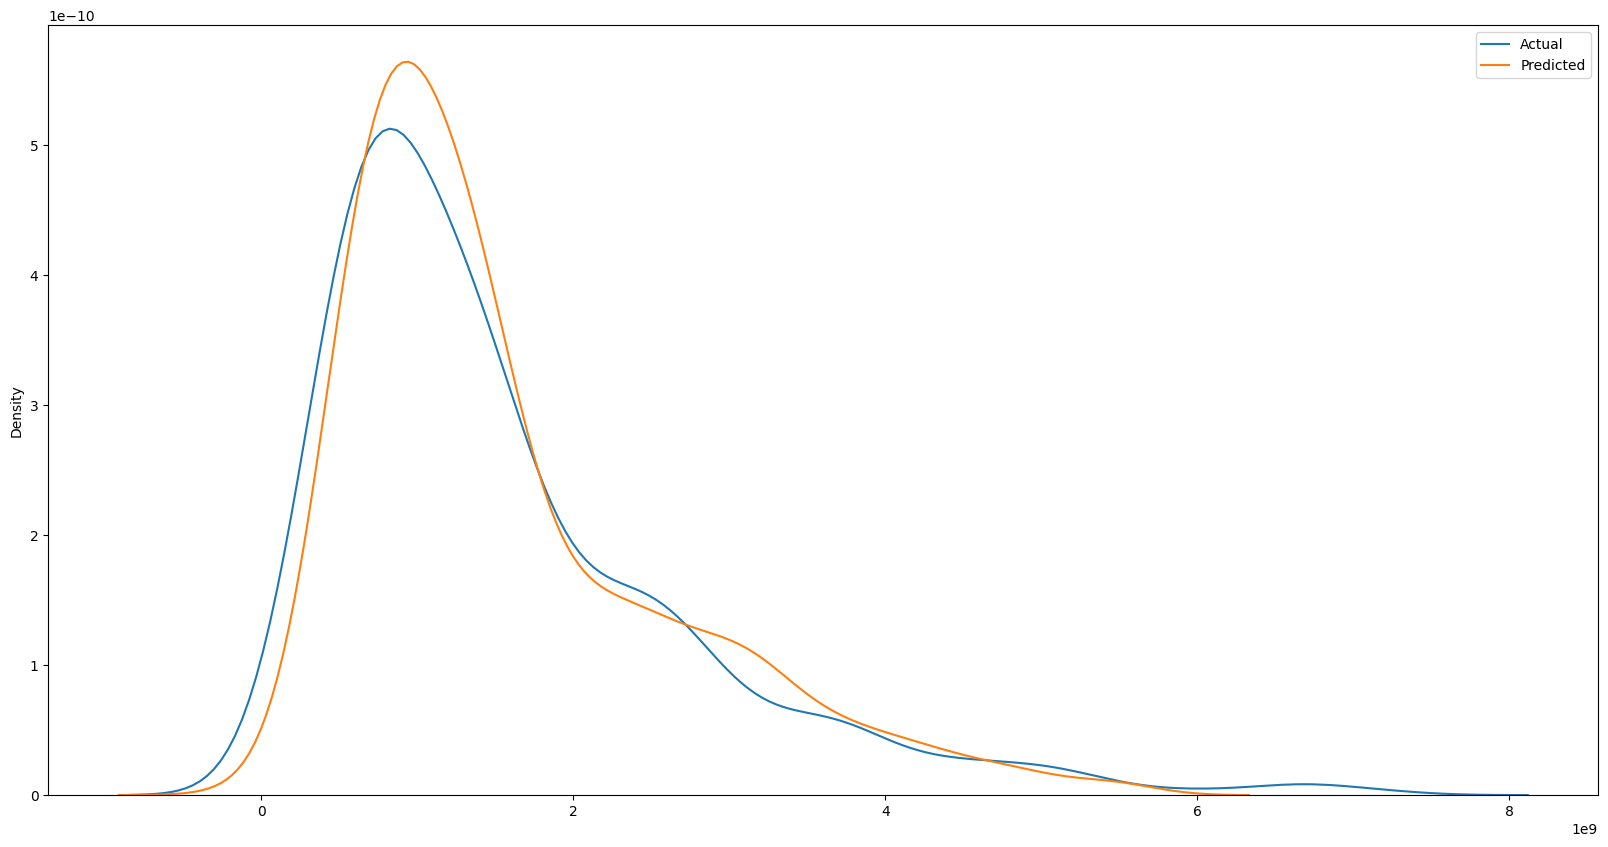

In [ ]:
#visualize the prediction
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_GBReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
print('Gradient Boosting Regression')
GBReg_model_train = GBReg_model.score(x_train,y_train.ravel())*100
GBReg_model_test = GBReg_model.score(x_test, y_test.ravel())*100

#Assess the performance of the Gradient Boosting Regression method by dividing the sample data by 10 folds randomly
GBReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
GBReg_model_score = cross_val_score(GBReg_model,x,y,cv=GBReg_model_cv)

print('Train : ',GBReg_model_train)
print('Test  : ',GBReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(GBReg_model_score)*100,2))

Gradient Boosting Regression
Train :  95.85423528241746
Test  :  75.8994960871117 

The Average Cross Validation Score is 83.59


Hasil pengujian menurun setelah model baru diterapkan dan penggunaaan hyperparameter, kemungkinan disebabkan oleh overfitting data karena ketidakseimbangan dataset.

# Linear Regression

Regresi Linear adalah algoritma untuk pemodelan regresi yang digunakan untuk memprediksi nilai variabel berdasarkan nilai variabel lain.

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg = LinearRegression()
LinReg.fit(x_train, y_train)

LinearRegression()

Model ini menggunakan parameter default dari kelas LinearRegression. Artinya, model akan menghitung intercept, tidak menyalin data input, dan menggunakan satu core prosesor.

**Parameter:**
1. copy_X=True: Menyalin data input (X) sebelum melakukan fit untuk menghindari perubahan pada data asli.
2. fit_intercept=False: Menentukan apakah model akan menghitung intercept (nilai y ketika x=0). Dalam kasus ini, intercept tidak dihitung.
3. n_jobs=-1: Menggunakan semua core prosesor yang tersedia untuk mempercepat komputasi.
4. positive=True: Membatasi koefisien regresi menjadi nilai positif.

In [ ]:
ypred_LinReg = sc.inverse_transform(LinReg.predict(x_test).reshape(-1,1))   #do the inverse to return to the original value (because it was previously standardized)
y_pred_LinReg = pd.DataFrame(ypred_LinReg)
y_pred_LinReg.tail()

,0
814,2.731071e+09
815,6.328292e+08
816,1.800445e+09
817,1.157412e+09
818,6.931270e+08


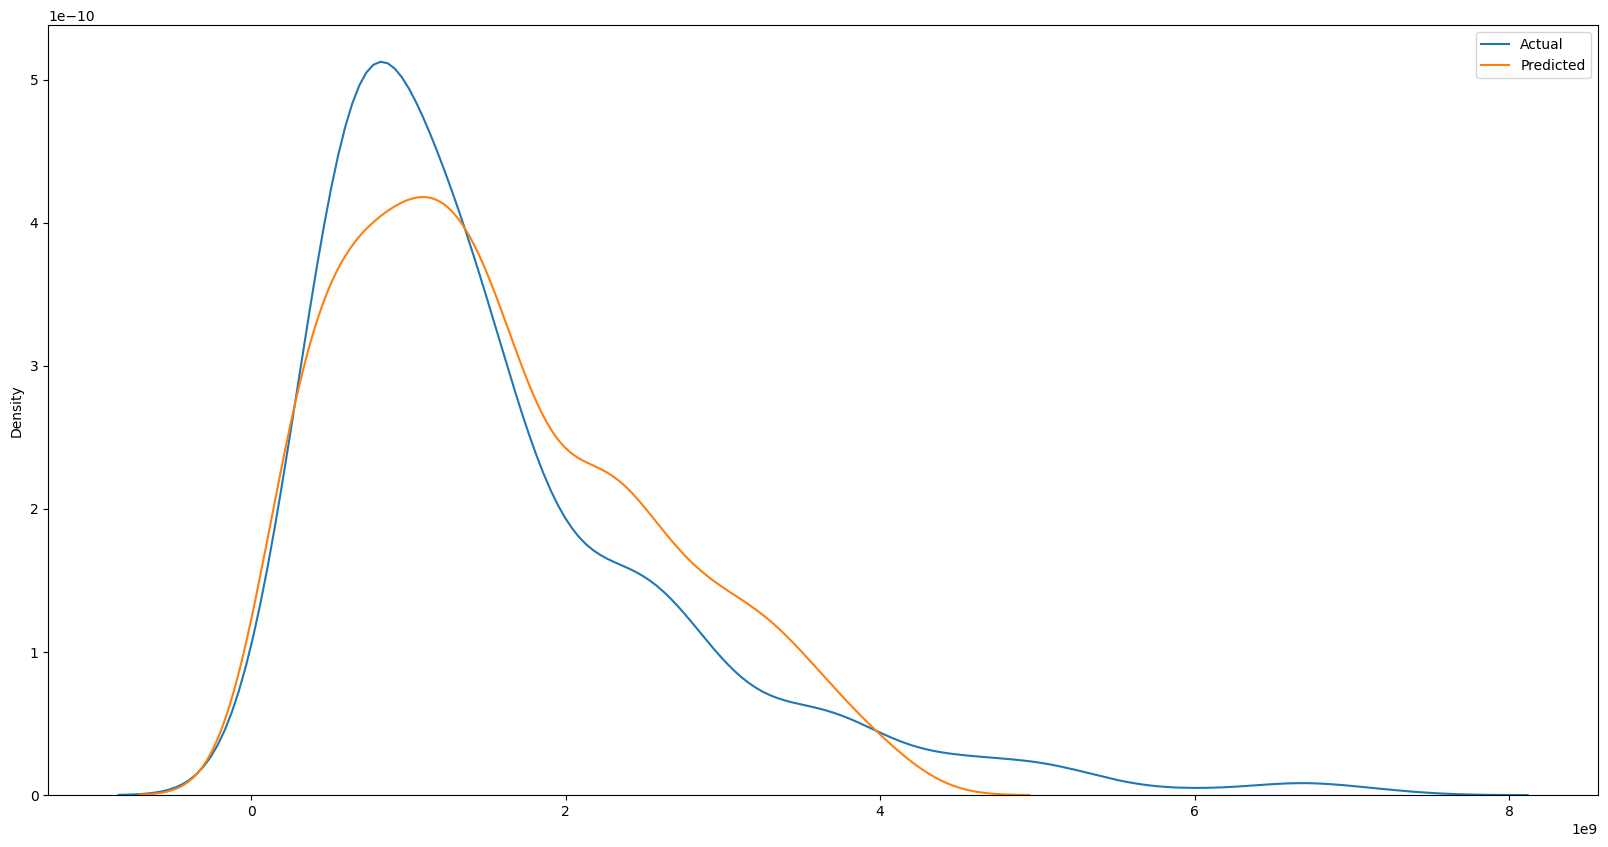

In [ ]:
sns.distplot(sc.inverse_transform(y_test), hist=False, label='Actual')
sns.distplot(y_pred_LinReg, hist=False, label='Predicted')
plt.legend()

In [ ]:
#Check the accuracy of testing and training of the Linear Regression model
print('Linear Regression')
LinReg_train = LinReg.score(x_train,y_train)*100
LinReg_test = LinReg.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_score = cross_val_score(LinReg,x,y,cv=LinReg_cv)

print('Train : ',LinReg_train)
print('Test  : ',LinReg_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_score)*100,2))

Linear Regression
Train :  71.21987811155678
Test  :  68.92017773204724 

The Average Cross Validation Score is 70.05


Hyperparameter Tuning

In [ ]:
LinReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:
param_grid = dict(
    copy_X=[True, False],
    fit_intercept=[True, False],
    n_jobs=np.arange(1,11),
    positive=[True, False],
)

LinReg_tuning = LinearRegression()

LinReg_search = GridSearchCV(estimator=LinReg_tuning,
                           param_grid=param_grid,
                           scoring='r2')

LinReg_best_model = LinReg_search.fit(x_train, y_train)
print('Optimum parameters', LinReg_best_model.best_params_)
print('Best score is {}'.format(LinReg_best_model.best_score_))

Optimum parameters {'copy_X': True, 'fit_intercept': False, 'n_jobs': 1, 'positive': False}
Best score is 0.7072291870978553


Fit new model

In [ ]:
from sklearn.linear_model import LinearRegression
LinReg_model = LinearRegression(copy_X= True, fit_intercept= False, n_jobs= 1, positive= True)
LinReg_model.fit(x_train, y_train)

LinearRegression(fit_intercept=False, n_jobs=1, positive=True)

Model ini menggunakan beberapa parameter tambahan yang tidak ada pada model kedua.

1. **copy_X=True:** Menyalin data input (X) sebelum melakukan fitting model. Hal ini berguna untuk menjaga data asli tetap utuh dan menghindari perubahan yang tidak diinginkan.
2. **fit_intercept=False:** Menentukan apakah model akan menghitung intercept (nilai y ketika x=0). Dalam kasus ini, intercept tidak dihitung. Artinya, garis regresi akan selalu melalui titik asal (0,0).
3. **n_jobs=-1:** Menggunakan semua core prosesor yang tersedia untuk mempercepat proses fitting model, terutama untuk dataset yang besar.
4. **positive=True:** Membatasi koefisien regresi menjadi nilai positif. Ini berguna jika kita yakin bahwa semua fitur memiliki pengaruh positif terhadap variabel target.

In [ ]:
ypred_LinReg_model = sc.inverse_transform(LinReg_model.predict(x_test).reshape(-1,1))
ypred_LinReg_model = pd.DataFrame(ypred_LinReg_model)
ypred_LinReg_model.tail()

,0
814,2.776904e+09
815,5.964204e+08
816,1.765553e+09
817,1.089192e+09
818,7.496376e+08


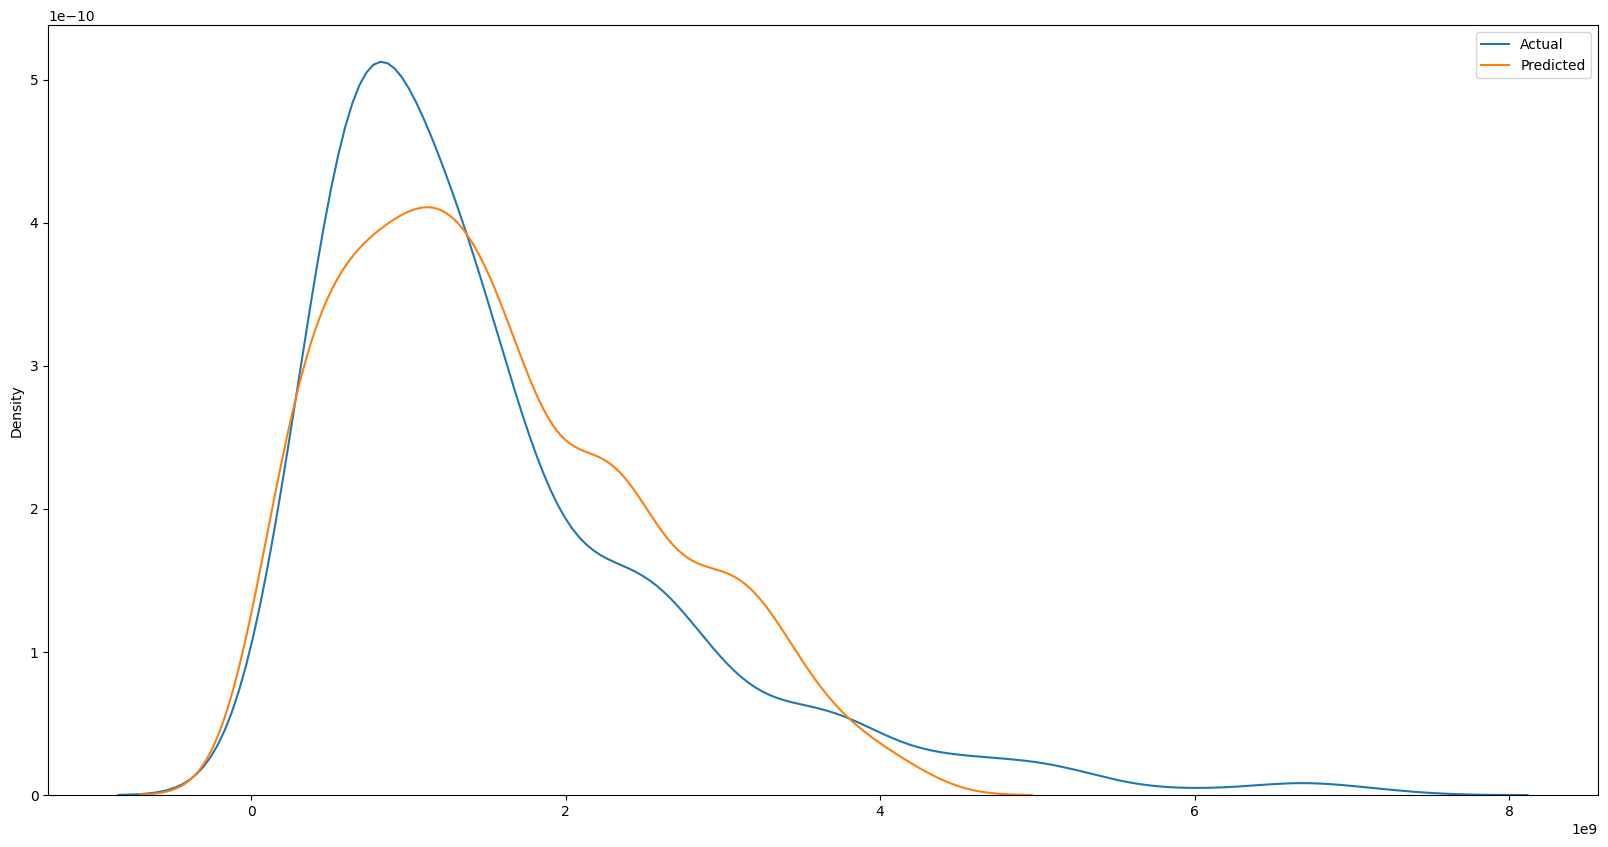

In [ ]:
sns.distplot(sc.inverse_transform(y_test),hist=False,label='Actual')
sns.distplot(ypred_LinReg_model,hist=False,label='Predicted')
plt.legend()

In [ ]:
print('Linear Regression')
LinReg_model_train = LinReg_model.score(x_train,y_train)*100
LinReg_model_test = LinReg_model.score(x_test, y_test)*100

#Assess the performance of the Linear Regression method by dividing the sample data by 10 folds randomly
LinReg_model_cv = KFold(n_splits=10, random_state=0, shuffle=True)
LinReg_model_score = cross_val_score(LinReg_model,x,y,cv=LinReg_model_cv)

print('Train : ',LinReg_model_train)
print('Test  : ',LinReg_model_test, '\n')
print('The Average Cross Validation Score is',np.round(np.mean(LinReg_model_score)*100,2))

Linear Regression
Train :  70.78618990189425
Test  :  68.57530435973285 

The Average Cross Validation Score is 64.97


Model baru Regresi Linier mengalami penurunan setelah penyetelan hyperparameter. Hal ini bisa terjadi karena overfitting(fokus pada pola di data latih), regularisasi yang tidak optimal, atau distribusi data yang tidak cocok serta masih tersisa data outlier.

# **Model Evaluasi**

Evaluasi di bawah ini dilakukan dengan menggunakan mean absolute error, mean squared error, dan r2-score. Semakin kecil mean absolute error dan mean squared error, tetapi semakin besar R2-score, semakin baik algoritma tersebut.

Skor-R2 (koefisien determinasi) fungsi skor regresi akan mewakili proporsi varian untuk item (rumah) dalam model regresi. Skor R2 menunjukkan seberapa cocok term (data point) dengan kurva atau garis.

Mean absolute error (MAE) merepresentasikan rata-rata perbedaan absolut antara nilai aktual dan prediksi dalam kumpulan data. Ini mengukur rata-rata residu dalam kumpulan data.

Mean Squared Error (MSE) mewakili rata-rata selisih kuadrat antara nilai asli dan prediksi dalam kumpulan data. Ini mengukur varian dari residu.


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
results= pd.DataFrame(columns=['R2-score','Mean Absolute Error','Mean Squared Error'])
results.loc['Linear Regression']=[r2_score(sc.inverse_transform(y_test),ypred_LinReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_LinReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_LinReg_model)]

results.loc['Gradient Boosting']=[r2_score(sc.inverse_transform(y_test),ypred_GBReg_model)*100,
                                  mean_absolute_error(sc.inverse_transform(y_test),ypred_GBReg_model),
                                  mean_squared_error(sc.inverse_transform(y_test),ypred_GBReg_model)]


#Sorts models based on R2-score
results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Purples', subset=['R2-score'])

,R2-score,Mean Absolute Error,Mean Squared Error
Gradient Boosting,75.899496,357877312.084352,336580248882836416.000000
Linear Regression,68.575304,455221341.404976,438867665086962944.000000


Dari hasil tabel di atas, model dengan algoritma Gradient Boosting memiliki R2-score tertinggi yaitu 75.9%. Sehingga model ini dapat menjadi pilihan terbaik untuk digunakan dalam memprediksi harga rumah di Jabodetabek.

**Prediction**

Prediksi harga rumah sesuai dengan permintaan Udin dengan kriteria sebagai berikut:
1. City = Bekasi
1. Bedrooms = 3
2. Bathrooms = 2
3. Luas Tanah = 210
4. Luas Bangunan = 180
5. Jumlah lantai = 2
6. Garasi = 1

Keterangan:

Bekasi = 0
Bogor = 1
Depok = 2
Jakarta Barat = 3
Jakarta Pusat = 4
Jakarta Selatan = 5
Jakarta Timur = 6
Jakarta Utara = 7
Tangerang = 8










**Linear Regression**

In [ ]:
# Prediksi pada data pelatihan
y_train_pred = LinReg.predict(x_train)
print("Training Accuracy: %.2f%%" % (LinReg.score(x_train, y_train)*100))

Training Accuracy: 71.22%


In [ ]:
# Prediksi pada data uji
y_pred = LinReg.predict(x_test)
print("Prediction Accuracy %.2f%%" % (LinReg.score(x_test, y_test)*100))

Prediction Accuracy 68.92%


In [ ]:
LinReg.predict([[0, 3, 2, 210, 180, 2, 1]])

array([[138.31317416]])

Harga rumah impian Udin berdasarkan hasil perhitungan menggunakan Linear Regression adalah:

138.31 miliar rupiah = Rp138.313.174.160



**Gradient Boosting**

In [ ]:
y_train_pred = GBReg.predict(x_train)
print("Training Accuracy: %.2f%%" % (GBReg.score(x_train, y_train)*100))

Training Accuracy: 97.39%


In [ ]:
# Prediksi pada data uji
y_pred = GBReg.predict(x_test)
print("Prediction Accuracy %.2f%%" % (GBReg.score(x_test, y_test)*100))

Prediction Accuracy 77.89%


In [ ]:
GBReg.predict([[0, 3, 2, 210, 180, 2, 1]])

array([3.18961465])

Harga rumah impian Udin berdasarkan hasil perhitungan menggunakan Gradient Boosting Regression adalah:

3.18 miliar rupiah = Rp3.189.614.650



**Kesimpulan Sementara**
1. Terlihat jelas adanya indikasi overfitting dalam model yang menggunakan Algoritma Gradient Boosting, bisa dilihat dari perbedaan selisih yang signifikan antara data pelatihan (97.39%) dan data pengujian (77.89%).
2. Meskipun model yang menggunakan Linear Regression menunjukkan tidak terlalu overfitting karena perbedaan akurasi antar pelatihan dan pengujian tidak terlalu besar, hanya 2-3%. Namun, hasil akurasi masih dibawah model yang menggunakan Gradient Boosting. Hal ini kemungkinan disebabkan oleh masih adanya outlier dalam model walaupun sudah dilakukan pembersihan menggunakan IQR method, mengingat algoritma ini cukup sensitif dengan outlier dibanding Gradien Boosting.
3. Ketidakseimbangan dalam dataset juga bisa menjadi salah satu penyebab yang memengaruhi hasil akurasi.

**Sekian Terima Kasih**

L